# Table of Contents 
1. [Exploratory Analysis](#Exploratory-analysis)
 1. [MLR Models](#choosing-which-mlr-models-would-be-best)
     1. [Split Models into Train/Test](#Put-Into-Test-and-Training-Sets-for-More-Accuracy)
 2. [RDF Models](#rdf-analysis)
     1. [Model 1 (All Variables)](#Model-1-=-all-variables-used)
     2. [Model 2 (Top 3)](#model-2-=-top-3-uan,-coal,-crude)
     3. [Model 3 (Top 4)](#model-3-=-top-4-crude,-corn,-coal,-uan)
     4. [Model 4 (Forward Top 3)](#Model-4-=-forward-top-3-dollar,-urea-inventory,-UAN)
     5. [Model 5 (Forward Top 2)](#Model-5-=-forward-top-2-dollar,-uan)
     6. [Model 6 (No correlation between x variables)](#Model-6-=-x-variables-not-correlated-to-each-other-gas,-urea_inventory,-UAN)
2. Using Model 4 UAN
 1. [Average Case](#Average-case)
     1. [MLR Models](#mlr-models-avg)
     2. [RDF Models](#rdf-models)
     3. [Predictions Part](#predictions-part)
 2. [Best Case](#Best-case)
     1. [MLR Models](#mlr-models-best)
     2. [RDF Models](#rdf-models-best)
     3. [Predictions Part](#predictions-part-best)
 3. [Worst Case](#Worst-case)
     1. [MLR Models](#mlr-models-worst)
     2. [RDF Models](#rdf-models-worst)
     3. [Predictions Part](#predictions-part-worst)
3. Using Model 5 UAN
 1. [Average Case](#Average-case-model-5)
     1. [MLR Models](#mlr-models-avg-model-5)
     2. [RDF Models](#rdf-models-model-5)
     3. [Predictions Part](#predictions-part-model-5)
 2. [Best Case](#Best-case-model-5)
     1. [MLR Models](#mlr-models-best-model-5)
     2. [RDF Models](#rdf-models-best-model-5)
     3. [Predictions Part](#predictions-part-best-model-5)
 3. [Worst Case](#Worst-case-model-5)
     1. [MLR Models](#mlr-models-worst-model-5)
     2. [RDF Models](#rdf-models-worst-model-5)
     3. [Predictions Part](#predictions-part-worst-model-5)
4. Using MLR 2 UAN
 1. [Average Case](#Average-case-mlr2)
     1. [MLR Models](#mlr-models-avg-mlr2)
     2. [RDF Models](#rdf-models-mlr2)
     3. [Predictions Part](#predictions-part-mlr2)
 2. [Best Case](#Best-case-mlr2)
     1. [MLR Models](#mlr-models-best-mlr2)
     2. [RDF Models](#rdf-models-best-mlr2)
     3. [Predictions Part](#predictions-part-best-mlr2)
 3. [Worst Case](#Worst-case-mlr2)
     1. [MLR Models](#mlr-models-worst-mlr2)
     2. [RDF Models](#rdf-models-worst-mlr2)
     3. [Predictions Part](#predictions-part-worst-mlr2)

# Exploratory Analysis
[Top](#table-of-contents)

In [1]:
#libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels import regression
import math
from matplotlib.ticker import MaxNLocator
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

In [34]:
data = pd.read_csv("C:/Users/msteinme/Documents/ureamorevariables.csv")
df_96on = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN','Urea']][0:1069]
df_96on.tail()

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,Urea
1064,5/27/2016,95.521,49.74,414.25,51.35,2.28,539602.5479,1044391.0,190.08,189.0
1065,6/3/2016,94.030,49.11,419.75,54.00,2.48,371191.0000,1048312.0,180.16,180.0
1066,6/10/2016,94.570,49.72,427.50,53.00,2.62,371191.0000,1048312.0,169.92,182.0
1067,6/17/2016,94.210,48.56,442.75,52.55,2.67,371191.0000,1048312.0,169.92,185.0
1068,6/24/2016,95.450,48.31,389.00,52.90,2.69,371191.0000,1048312.0,165.12,182.0


## Before Proceeding Please Go To Forward Selection MLR Model
[Click Here to Get to Forward Selection](#forward-selection)

In [35]:
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

Date              datetime64[ns]
Dollar                   float64
Crude                    float64
Corn                     float64
My_Coal                  float64
Gas                      float64
Urea_Inventory           float64
UAN_Inventory            float64
UAN                      float64
Urea                     float64
dtype: object

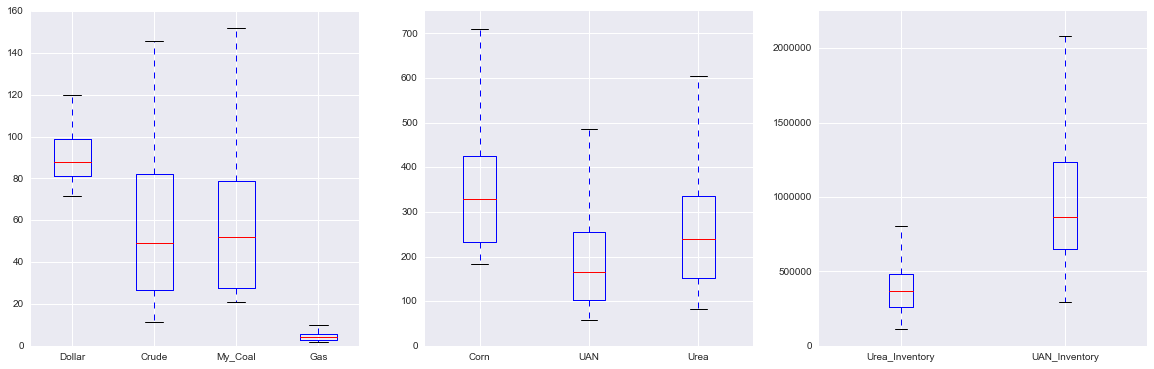

In [6]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
x1 = df_96on[['Dollar']]
x2 = df_96on[['Crude']]
x3 = df_96on[['Corn']]
x4 = df_96on[['My_Coal']]
x5 = df_96on[['Gas']]
x6 = df_96on[['Urea_Inventory']]
x7 = df_96on[['UAN_Inventory']]
x8 = df_96on[['UAN']]
x9 = df_96on[['Urea']]
ax1.boxplot([x1,x2,x4,x5])
ax1.set_xticklabels(['Dollar','Crude','My_Coal','Gas'])
ax1.set_ylim([0,160])
ax2.boxplot([x3,x8,x9])
ax2.set_xticklabels(['Corn','UAN','Urea'])
ax2.set_ylim([0,750])
ax3.boxplot([x6,x7])
ax3.set_xticklabels(['Urea_Inventory','UAN_Inventory'])
ax3.set_ylim([0,2250000])
plt.show()

In [7]:
df_96on.describe()

,Dollar,Crude,Corn,Gas,My_Coal,Urea_Inventory,UAN_Inventory,UAN,Urea
count,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1.069000e+03,1069.000000,1069.000000
mean,90.700949,54.744191,362.061272,4.584039,58.229139,380087.337519,1.005712e+06,183.682245,259.563143
std,11.671409,31.145360,156.191066,2.363132,33.461555,151666.435967,4.891736e+05,96.238083,135.297463
min,71.657000,11.260000,182.500000,1.661000,20.900000,115938.863000,2.977011e+05,58.000000,83.000000
25%,81.225000,26.520000,231.500000,2.741000,27.425593,259565.000000,6.506015e+05,101.520000,152.000000
50%,87.950000,49.120000,327.750000,4.017000,51.850000,369767.000000,8.625000e+05,165.200000,240.000000
75%,98.683000,81.920000,424.500000,5.810000,78.600000,479692.000000,1.233929e+06,255.040000,335.000000
max,119.900000,145.860000,809.250000,14.431000,192.500000,843000.000000,2.588393e+06,514.880000,825.000000


In [8]:
df_96on.corr()

,Dollar,Crude,Corn,Gas,My_Coal,Urea_Inventory,UAN_Inventory,UAN,Urea
Dollar,1.000000,-0.775075,-0.680653,-0.331586,-0.755375,0.507091,0.526033,-0.699332,-0.728708
Crude,-0.775075,1.000000,0.776642,0.393712,0.894902,-0.583372,-0.583930,0.878954,0.870152
Corn,-0.680653,0.776642,1.000000,-0.003184,0.834645,-0.357273,-0.370750,0.816722,0.797710
Gas,-0.331586,0.393712,-0.003184,1.000000,0.285758,-0.245680,-0.480777,0.343798,0.326728
My_Coal,-0.755375,0.894902,0.834645,0.285758,1.000000,-0.450831,-0.491379,0.896668,0.882164
Urea_Inventory,0.507091,-0.583372,-0.357273,-0.245680,-0.450831,1.000000,0.707121,-0.474546,-0.518107
UAN_Inventory,0.526033,-0.583930,-0.370750,-0.480777,-0.491379,0.707121,1.000000,-0.529576,-0.531987
UAN,-0.699332,0.878954,0.816722,0.343798,0.896668,-0.474546,-0.529576,1.000000,0.953007
Urea,-0.728708,0.870152,0.797710,0.326728,0.882164,-0.518107,-0.531987,0.953007,1.000000


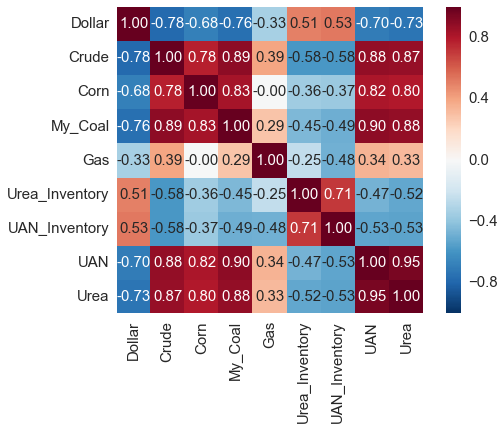

In [9]:
cols= ['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN','Urea']
cm = np.corrcoef(df_96on[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()

 - dollar corr to crude, corn, coal, both inventories, uan and urea
 - crude corr to dollar, corn, coal, both inventories, uan and urea
 - corn corr to dollar, crude, coal, uan and urea
 - coal corr to dollar, crude, corn, uan and urea
 - gas corr to nothing
 - urea inventory corr to dollar, crude, uan_inventory and urea
 - uan inventory corr to dollar, crude, urea inventory, uan and urea
 - uan corr to dollar, crude, corn, coal, uan inventory and urea
 - urea corr to dollar, crude, corn, coal, urea_inventory, uan_inventory, uan

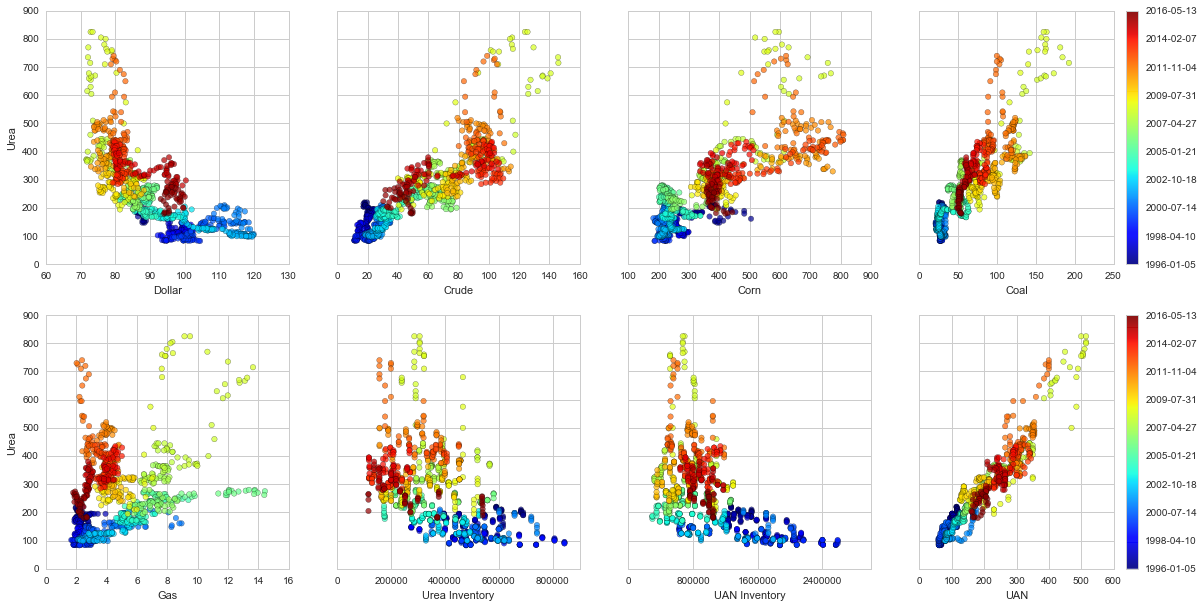

In [36]:
x1 = df_96on['Dollar']
x2 = df_96on['Crude']
x3 = df_96on['Corn']
x4 = df_96on['My_Coal']
x5 = df_96on['Gas']
x6 = df_96on['Urea_Inventory']
x7 = df_96on['UAN_Inventory']
x8 = df_96on['UAN']
y1 = df_96on['Urea']
x1 = np.array(x1)
x2 = np.array(x2)
x3 = np.array(x3)
x4 = np.array(x4)
x5 = np.array(x5)
x6 = np.array(x6)
x7 = np.array(x7)
x8 = np.array(x8)
cm = plt.get_cmap('jet')
colors = np.linspace(0.1, 1, len(x1))
fig, axes = plt.subplots(2,4,sharey=True,figsize=(20,10))
a0 = axes[0][0].scatter(x1,y1,s=30,c=colors,cmap=cm,edgecolor='k',alpha=0.7)
axes[0][0].set_ylabel('Urea')
axes[0][0].set_xlabel('Dollar')
a1 = axes[0][1].scatter(x2,y1,s=30,c=colors,cmap=cm,edgecolor='k',alpha=0.7)
axes[0][1].set_xlabel('Crude')
a2 = axes[0][2].scatter(x3,y1,s=30,c=colors,cmap=cm,edgecolor='k',alpha=0.7)
axes[0][2].set_xlabel('Corn')
a3 = axes[0][3].scatter(x4,y1,s=30,c=colors,cmap=cm,edgecolor='k',alpha=0.7)
axes[0][3].set_xlabel('Coal')
a4 = axes[1][0].scatter(x5,y1,s=30,c=colors,cmap=cm,edgecolor='k',alpha=0.7)
axes[1][0].set_xlabel('Gas')
axes[1][0].set_ylabel('Urea')
a5 = axes[1][1].scatter(x6,y1,s=30,c=colors,cmap=cm,edgecolor='k',alpha=0.7)
axes[1][1].set_xlabel('Urea Inventory')
axes[1][1].xaxis.set_major_locator(MaxNLocator(5))
a6 = axes[1][2].scatter(x7,y1,s=30,c=colors,cmap=cm,edgecolor='k',alpha=0.7)
axes[1][2].set_xlabel('UAN Inventory')
axes[1][2].xaxis.set_major_locator(MaxNLocator(4))
a6 = axes[1][3].scatter(x8,y1,s=30,c=colors,cmap=cm,edgecolor='k',alpha=0.7)
axes[1][3].set_xlabel('UAN')
cbar1 = fig.colorbar(a3,ax=axes[0][3])
cbar2 = fig.colorbar(a4,ax=axes[1][3])
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.index = df_96on['Date'].values
df_96on = df_96on.drop(['Date'],axis=1)
X = df_96on[['Dollar']]
Y = df_96on[['Urea']]
cbar1.ax.set_yticklabels([str(p.date()) for p in X[::len(X)//9].index])
cbar2.ax.set_yticklabels([str(p.date()) for p in X[::len(X)//9].index])
plt.show()

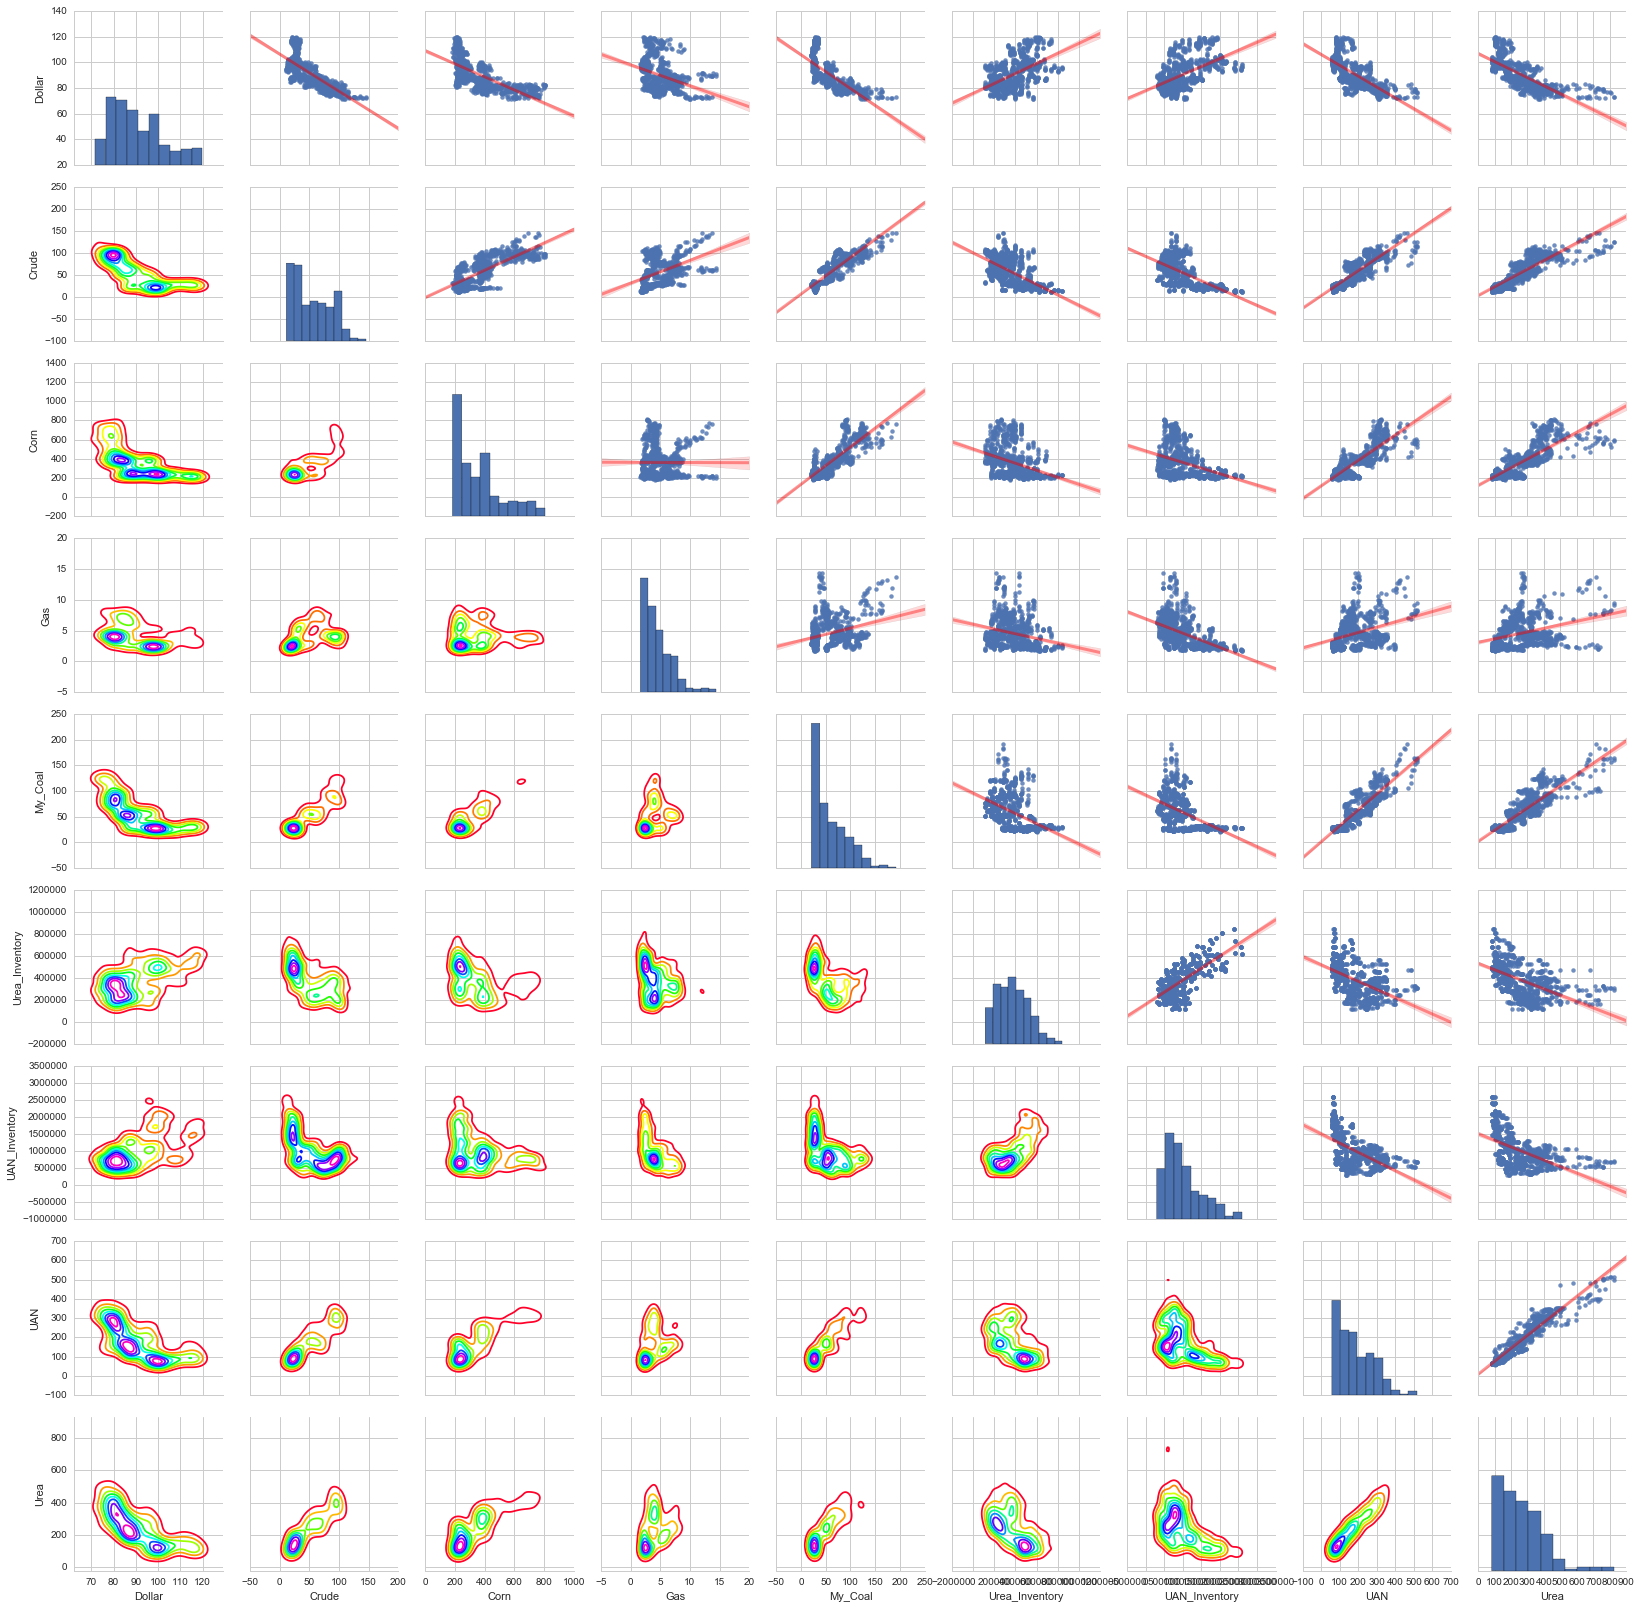

In [11]:
sns.set(style='whitegrid', context='notebook')
corrPlots = sns.PairGrid(df_96on)
corrPlots = corrPlots.map_diag(plt.hist)
corrPlots = corrPlots.map_lower(sns.kdeplot,cmap="gist_rainbow")
corrPlots = corrPlots.map_upper(sns.regplot,line_kws={"color":"r","alpha":0.4,"lw":3}) 

# Choosing Which MLR Models Would be Best
[Top](#table-of-contents)

In [12]:
# mlr model that has all the variables included
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Inventory','UAN_Inventory','UAN']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()
#too large of p-values so model wouldn't work

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1529.
Date:                Thu, 14 Jul 2016   Prob (F-statistic):               0.00
Time:                        08:23:45   Log-Likelihood:                -5410.9
No. Observations:                1069   AIC:                         1.084e+04
Df Residuals:                    1060   BIC:                         1.088e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            138.6858     19.504      7.111      0.000       100.414   176.957
Dollar            -0.9553      0.172     -5.564      0.000        -1.292    -0.618
Crude              0.0340      0.109      0.311      0.756        -0.180     0.248
Corn               0.0059      0.018      0.323      0.747        -0.030     0.042
Gas               -0.1595      0.746     -0.214      0.831        -1.624     1.305
My_Coal            0.2873      0.101      2.858      0.004         0.090     0.485
Urea_Inventory -7.365e-05   1.24e-05     -5.961      0.000     -9.79e-05 -4.94e-05
UAN_Inventory   9.231e-06   3.93e-06      2.347      0.019      1.51e-06  1.69e-05
UAN                1.1228      0.033     34.355      0.000         1.059     1.187
==============================================================================
Omnibus:                      272.262   Durbin-Watson:                   0.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1463.695
Skew:                           1.063   Prob(JB):                         0.00
Kurtosis:                       8.324   Cond. No.                     1.97e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# RFECV
#order is 'Dollar','Crude','Corn','Gas','My_Coal','Urea_Inventory','UAN_Inventory','uan'
regression = LinearRegression()
selector = RFECV(estimator=regression, cv=10,
   scoring='mean_squared_error')
selector.fit(X, Y)

sfm = SelectFromModel(regression, threshold = 0.25)
print("Optimal number of features: %d" 
   % selector.n_features_)
print ([selector.support_])
print(selector.ranking_)
print(selector) #srarts at 2nd so important = dollar, gas, and UAN

Optimal number of features: 3
[array([False,  True, False, False,  True, False, False, False,  True], dtype=bool)]
[7 1 2 4 1 3 5 6 1]
RFECV(cv=10,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
   estimator_params=None, scoring='mean_squared_error', step=1, verbose=0)


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
#rfecv choice
X = df_96on[['Dollar','Gas','UAN']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary() #however p-value to large on gas so can't work

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     3870.
Date:                Thu, 14 Jul 2016   Prob (F-statistic):               0.00
Time:                        08:23:55   Log-Likelihood:                -5438.7
No. Observations:                1069   AIC:                         1.089e+04
Df Residuals:                    1065   BIC:                         1.091e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        169.0083     15.975     10.579      0.000       137.662   200.355
Dollar        -1.4408      0.145     -9.909      0.000        -1.726    -1.156
Gas           -0.7950      0.547     -1.454      0.146        -1.868     0.278
UAN            1.2243      0.018     69.108      0.000         1.190     1.259
==============================================================================
Omnibus:                      249.097   Durbin-Watson:                   0.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1392.008
Skew:                           0.950   Prob(JB):                    5.36e-303
Kurtosis:                       8.257   Cond. No.                     2.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Forward Selection
[Click Here to Get Back to Where You Left Off](#Before-Proceeding-Please-Go-To-Forward-Selection-MLR-Model)

In [3]:
#forward selection, must do this before change the datetimes
data = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Inventory','UAN_Inventory','UAN']]
Y = df_96on[['Urea']]
response = df_96on['Urea'] # need to have in the series format
Y = np.array(Y)

#forward stepwise regression formula
def forward_aic(response, data):
    # This function will work with pandas dataframes and series
    
    # Initialize some variables
    explanatory = list(data.columns)
    selected = pd.Series(np.ones(data.shape[0]), name="Intercept")
    current_score, best_new_score = np.inf, np.inf
    
    # Loop while we haven't found a better model
    while current_score == best_new_score and len(explanatory) != 0:
        
        scores_with_elements = []
        count = 0
        
        # For each explanatory variable
        for element in explanatory:
            # Make a set of explanatory variables including our current best and the new one
            tmp = pd.concat([selected, data[element]], axis=1)
            # Test the set
            result = regression.linear_model.OLS(Y, tmp).fit()
            score = result.aic
            scores_with_elements.append((score, element, count))
            count += 1
        
        # Sort the scoring list
        scores_with_elements.sort(reverse = True)
        # Get the best new variable
        best_new_score, best_element, index = scores_with_elements.pop()
        if current_score > best_new_score:
            # If it's better than the best add it to the set
            explanatory.pop(index)
            selected = pd.concat([selected, data[best_element]],axis=1)
            current_score = best_new_score
    # Return the final model
    model = regression.linear_model.OLS(Y, selected).fit()
    return model

In [4]:
result = forward_aic(Y, data)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     2451.
Date:                Thu, 14 Jul 2016   Prob (F-statistic):               0.00
Time:                        08:20:05   Log-Likelihood:                -5411.1
No. Observations:                1069   AIC:                         1.083e+04
Df Residuals:                    1063   BIC:                         1.086e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        140.9947     16.565      8.512      0.000       108.491   173.499
UAN                1.1289      0.028     39.880      0.000         1.073     1.184
Dollar            -0.9751      0.161     -6.051      0.000        -1.291    -0.659
Urea_Inventory -7.519e-05   1.12e-05     -6.694      0.000     -9.72e-05 -5.31e-05
My_Coal            0.3155      0.087      3.635      0.000         0.145     0.486
UAN_Inventory   9.804e-06   3.59e-06      2.728      0.006      2.75e-06  1.69e-05
==============================================================================
Omnibus:                      271.594   Durbin-Watson:                   0.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1464.691
Skew:                           1.059   Prob(JB):                         0.00
Kurtosis:                       8.329   Cond. No.                     1.67e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# top 3 of forward since dollar and urea inventory not used in predicting uan
X = df_96on[['Dollar','Urea_Inventory','UAN']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     4005.
Date:                Thu, 14 Jul 2016   Prob (F-statistic):               0.00
Time:                        08:28:24   Log-Likelihood:                -5421.9
No. Observations:                1069   AIC:                         1.085e+04
Df Residuals:                    1065   BIC:                         1.087e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            165.9794     15.290     10.855      0.000       135.977   195.981
Dollar            -1.1645      0.148     -7.887      0.000        -1.454    -0.875
Urea_Inventory -5.556e-05   9.23e-06     -6.022      0.000     -7.37e-05 -3.75e-05
UAN                1.1995      0.018     68.414      0.000         1.165     1.234
==============================================================================
Omnibus:                      279.274   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1489.950
Skew:                           1.096   Prob(JB):                         0.00
Kurtosis:                       8.352   Cond. No.                     5.29e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#top 2
X = df_96on[['Dollar','UAN']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary() #adj squared didn't change much, aic went up, but conditional # went down
# I will use this one and the above model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     5797.
Date:                Thu, 14 Jul 2016   Prob (F-statistic):               0.00
Time:                        08:29:05   Log-Likelihood:                -5439.8
No. Observations:                1069   AIC:                         1.089e+04
Df Residuals:                    1066   BIC:                         1.090e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        163.5447     15.535     10.527      0.000       133.061   194.028
Dollar        -1.4121      0.144     -9.798      0.000        -1.695    -1.129
UAN            1.2200      0.017     69.798      0.000         1.186     1.254
==============================================================================
Omnibus:                      257.822   Durbin-Watson:                   0.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1487.991
Skew:                           0.978   Prob(JB):                         0.00
Kurtosis:                       8.439   Cond. No.                     2.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Put Into Test and Training Sets for More Accuracy
[Top](#table-of-contents)

In [64]:
# top 3 of forward
featured_cols_top3 = ['Dollar','Urea_Inventory','UAN']
X7 = df_96on[featured_cols_top3]
y7 = df_96on['Urea']
trainX7, testX7, trainY7, testY7 = train_test_split(X7,y7,test_size=0.3)
lm7 = LinearRegression()
lm7.fit(trainX7,trainY7)
zip(featured_cols_top3,lm7.coef_)
print(lm7.intercept_)
print(lm7.coef_)
print(lm7.score(trainX7,trainY7))

170.310812379
[ -1.20256833e+00  -5.62270791e-05   1.19184310e+00]
0.909122546304


In [65]:
# top 2 of forward
featured_cols_top2 = ['Dollar','UAN']
X8 = df_96on[featured_cols_top2]
y8 = df_96on['Urea']
trainX8, testX8, trainY8, testY8 = train_test_split(X8,y8,test_size=0.3)
lm8 = LinearRegression()
lm8.fit(trainX8,trainY8)
zip(featured_cols_top2,lm8.coef_)
print(lm8.intercept_)
print(lm8.coef_)
print(lm8.score(trainX8,trainY8))

152.439921872
[-1.29107569  1.21879845]
0.91183097706


# RDF Analysis
[Top](#table-of-contents)

In [22]:
X = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [27]:
#do multiple times to see what parameters are the best
rdf_model_ureaall = fit_predict_model(X_train,y_train)
print (rdf_model_ureaall.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


### Model 1 = All variables used

In [37]:
X1 = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN']].values
y1 = df_96on['Urea'].values
X_train1, X_test1, y_train1, y_test1= train_test_split(X1,y1,test_size=0.3,random_state=1)
forest1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1.fit(X_train1, y_train1)
y_train_pred1= forest1.predict(X_train1)
y_test_pred1= forest1.predict(X_test1)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1, y_train_pred1),mean_squared_error(y_test1, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1, y_train_pred1),r2_score(y_test1,y_test_pred1)))
print(forest1.feature_importances_)

MSE train: 49.912, test: 397.925
R^2 train: 0.997, test: 0.978
[ 0.00864284  0.04478929  0.02723581  0.06820789  0.01393714  0.00778532
  0.00452457  0.82487713]


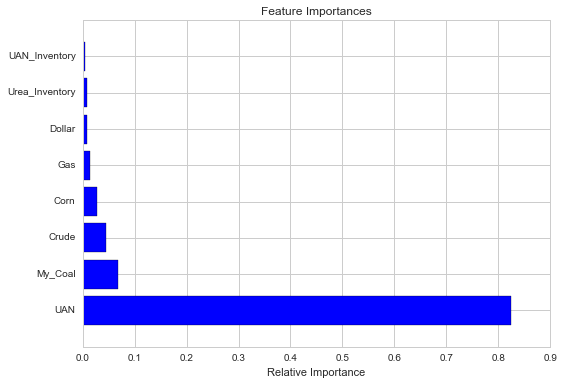

In [38]:
features = df_96on.columns[0:8]
importances = forest1.feature_importances_
indices = np.argsort(importances)
#this is saying put the variable of most importance first, descending from there
indices= np.argsort(importances)[::-1]
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

### Model 2 = Top 3 UAN, coal, crude

In [42]:
#top 3
X = df_96on[['Crude','My_Coal','UAN']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
rdf_model_ureatop3 = fit_predict_model(X_train,y_train)
print (rdf_model_ureatop3.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [43]:
X2 = df_96on[['Crude','My_Coal','UAN']].values
y2 = df_96on['Urea'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3,random_state=1)
forest2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2.fit(X_train2, y_train2)
y_train_pred2 = forest2.predict(X_train2)
y_test_pred2 = forest2.predict(X_test2)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2, y_train_pred2),mean_squared_error(y_test2, y_test_pred2)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2, y_train_pred2),r2_score(y_test2,y_test_pred2)))
print(forest2.feature_importances_)

MSE train: 106.517, test: 466.778
R^2 train: 0.994, test: 0.975
[ 0.0632933   0.09351142  0.84319529]


### Model 3 = Top 4 crude, corn, coal, uan

In [46]:
#top 4
X = df_96on[['Crude','Corn','My_Coal','UAN']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
rdf_model_ureatop4 = fit_predict_model(X_train,y_train)
print (rdf_model_ureatop4.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [47]:
X3 = df_96on[['Crude','Corn','My_Coal','UAN']].values
y3 = df_96on['Urea'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3,random_state=1)
forest3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3.fit(X_train3, y_train3)
y_train_pred3 = forest3.predict(X_train3)
y_test_pred3 = forest3.predict(X_test3)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3, y_train_pred3),mean_squared_error(y_test3, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3, y_train_pred3),r2_score(y_test3,y_test_pred3)))
print(forest3.feature_importances_)

MSE train: 94.954, test: 412.106
R^2 train: 0.995, test: 0.978
[ 0.05266206  0.03391748  0.08427006  0.8291504 ]


### Model 4 = Forward Top 3 dollar, urea inventory, UAN

In [52]:
X = df_96on[['Dollar','Urea_Inventory','UAN']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
rdf_model_ureafortop3 = fit_predict_model(X_train,y_train)
print (rdf_model_ureafortop3.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [53]:
X4 = df_96on[['Dollar','Urea_Inventory','UAN']].values
y4 = df_96on['Urea'].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.3,random_state=1)
forest4 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4.fit(X_train4, y_train4)
y_train_pred4 = forest4.predict(X_train4)
y_test_pred4 = forest4.predict(X_test4)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4, y_train_pred4),mean_squared_error(y_test4, y_test_pred4)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4, y_train_pred4),r2_score(y_test4,y_test_pred4)))
print(forest4.feature_importances_)

MSE train: 116.977, test: 409.559
R^2 train: 0.994, test: 0.978
[ 0.03030722  0.02305509  0.9466377 ]


### Model 5 = Forward Top 2 dollar, UAN

In [58]:
X = df_96on[['Dollar','UAN']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
rdf_model_ureaforward2 = fit_predict_model(X_train,y_train)
print (rdf_model_ureaforward2.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [59]:
X5 = df_96on[['Dollar','UAN']].values
y5 = df_96on['Urea'].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.3,random_state=1)
forest5 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest5.fit(X_train5, y_train5)
y_train_pred5 = forest5.predict(X_train5)
y_test_pred5 = forest5.predict(X_test5)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train5, y_train_pred5),mean_squared_error(y_test5, y_test_pred5)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train5, y_train_pred5),r2_score(y_test5,y_test_pred5)))
print(forest5.feature_importances_)

MSE train: 274.092, test: 653.106
R^2 train: 0.985, test: 0.965
[ 0.03988554  0.96011446]


### Model 6 = x variables not correlated to each other gas, urea_inventory, UAN

In [67]:
X = df_96on[['Gas','Urea_Inventory','UAN']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
rdf_model_ureanocorr = fit_predict_model(X_train,y_train)
print (rdf_model_ureanocorr.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [68]:
X6 = df_96on[['Gas','Urea_Inventory','UAN']].values
y6 = df_96on['Urea'].values
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6,y6,test_size=0.3,random_state=1)
forest6 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest6.fit(X_train6, y_train6)
y_train_pred6 = forest6.predict(X_train6)
y_test_pred6 = forest6.predict(X_test6)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train6, y_train_pred6),mean_squared_error(y_test6, y_test_pred6)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train6, y_train_pred6),r2_score(y_test6,y_test_pred6)))
print(forest6.feature_importances_)

MSE train: 101.001, test: 578.372
R^2 train: 0.994, test: 0.969
[ 0.02721718  0.02520843  0.94757438]


# Using Model 4 UAN
## Average Case
[Top](#table-of-contents)

In [69]:
#libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels import regression
import math
from matplotlib.ticker import MaxNLocator
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

In [72]:
data = pd.read_csv("C:/Users/msteinme/Documents/ureaUANjuneavg.csv")
df_96on = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN','Urea']][0:1069]
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.tail(2)
#1/5/1996 - 6/24/2016

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,Urea
1067,2016-06-17,94.21,48.56,442.75,52.55,2.67,494921,1048312,169.92,185.0
1068,2016-06-24,95.45,48.31,389.00,52.90,2.69,494921,1048312,165.12,182.0


### MLR Models Avg
[Top](#table-of-contents)

In [74]:
# mlr1 top 3 of forward
featured_cols_top3 = ['Dollar','Urea_Inventory','UAN']
X7 = df_96on[featured_cols_top3]
y7 = df_96on['Urea']
trainX7, testX7, trainY7, testY7 = train_test_split(X7,y7,test_size=0.3)
lm7 = LinearRegression()
lm7.fit(trainX7,trainY7)
zip(featured_cols_top3,lm7.coef_)

In [75]:
# mlr2 top 2 of forward
featured_cols_top2 = ['Dollar','UAN']
X8 = df_96on[featured_cols_top2]
y8 = df_96on['Urea']
trainX8, testX8, trainY8, testY8 = train_test_split(X8,y8,test_size=0.3)
lm8 = LinearRegression()
lm8.fit(trainX8,trainY8)
zip(featured_cols_top2,lm8.coef_)

### RDF Models
[Top](#table-of-contents)

In [76]:
#model 1
X1 = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN']].values
y1 = df_96on['Urea'].values
X_train1, X_test1, y_train1, y_test1= train_test_split(X1,y1,test_size=0.3,random_state=1)
forest1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1.fit(X_train1, y_train1)
y_train_pred1= forest1.predict(X_train1)
y_test_pred1= forest1.predict(X_test1)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1, y_train_pred1),mean_squared_error(y_test1, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1, y_train_pred1),r2_score(y_test1,y_test_pred1)))
print(forest1.feature_importances_)

MSE train: 52.949, test: 393.539
R^2 train: 0.997, test: 0.979
[ 0.00882961  0.03989869  0.02719925  0.0754114   0.01371491  0.00816446
  0.00443248  0.82234919]


In [77]:
#model 2
X2 = df_96on[['Crude','My_Coal','UAN']].values
y2 = df_96on['Urea'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3,random_state=1)
forest2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2.fit(X_train2, y_train2)
y_train_pred2 = forest2.predict(X_train2)
y_test_pred2 = forest2.predict(X_test2)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2, y_train_pred2),mean_squared_error(y_test2, y_test_pred2)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2, y_train_pred2),r2_score(y_test2,y_test_pred2)))
print(forest2.feature_importances_)

MSE train: 105.267, test: 445.247
R^2 train: 0.994, test: 0.976
[ 0.05999044  0.09567426  0.84433531]


In [78]:
#model 3
X3 = df_96on[['Crude','Corn','My_Coal','UAN']].values
y3 = df_96on['Urea'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3,random_state=1)
forest3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3.fit(X_train3, y_train3)
y_train_pred3 = forest3.predict(X_train3)
y_test_pred3 = forest3.predict(X_test3)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3, y_train_pred3),mean_squared_error(y_test3, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3, y_train_pred3),r2_score(y_test3,y_test_pred3)))
print(forest3.feature_importances_)

MSE train: 88.875, test: 411.650
R^2 train: 0.995, test: 0.978
[ 0.05985487  0.03384026  0.07550873  0.83079614]


In [79]:
#model 4
X4 = df_96on[['Dollar','Urea_Inventory','UAN']].values
y4 = df_96on['Urea'].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.3,random_state=1)
forest4 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4.fit(X_train4, y_train4)
y_train_pred4 = forest4.predict(X_train4)
y_test_pred4 = forest4.predict(X_test4)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4, y_train_pred4),mean_squared_error(y_test4, y_test_pred4)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4, y_train_pred4),r2_score(y_test4,y_test_pred4)))
print(forest4.feature_importances_)

MSE train: 113.118, test: 406.964
R^2 train: 0.994, test: 0.978
[ 0.03092065  0.02353364  0.94554571]


In [80]:
#model 5
X5 = df_96on[['Dollar','UAN']].values
y5 = df_96on['Urea'].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.3,random_state=1)
forest5 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest5.fit(X_train5, y_train5)
y_train_pred5 = forest5.predict(X_train5)
y_test_pred5 = forest5.predict(X_test5)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train5, y_train_pred5),mean_squared_error(y_test5, y_test_pred5)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train5, y_train_pred5),r2_score(y_test5,y_test_pred5)))
print(forest5.feature_importances_)

MSE train: 285.839, test: 636.619
R^2 train: 0.984, test: 0.966
[ 0.03989713  0.96010287]


In [81]:
#model 6
X6 = df_96on[['Gas','Urea_Inventory','UAN']].values
y6 = df_96on['Urea'].values
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6,y6,test_size=0.3,random_state=1)
forest6 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest6.fit(X_train6, y_train6)
y_train_pred6 = forest6.predict(X_train6)
y_test_pred6 = forest6.predict(X_test6)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train6, y_train_pred6),mean_squared_error(y_test6, y_test_pred6)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train6, y_train_pred6),r2_score(y_test6,y_test_pred6)))
print(forest6.feature_importances_)

MSE train: 96.713, test: 579.642
R^2 train: 0.995, test: 0.969
[ 0.02724525  0.02539586  0.9473589 ]


In [82]:
# comparing models that will be used
model1 = forest1.predict(X1)
model2 = forest2.predict(X2)
model3 = forest3.predict(X3)
model4 = forest4.predict(X4)
model5 = forest5.predict(X5)
model6 = forest6.predict(X6)
mlr1 = lm7.predict(X7)
mlr2 = lm8.predict(X8)
model1 = pd.DataFrame(model1)
model2 = pd.DataFrame(model2)
model3 = pd.DataFrame(model3)
model4 = pd.DataFrame(model4)
model5 = pd.DataFrame(model5)
model6 = pd.DataFrame(model6)
mlr1 = pd.DataFrame(mlr1)
mlr2 = pd.DataFrame(mlr2)
df_96on['MLR1'] = mlr1
df_96on['MLR2'] = mlr2
df_96on['Model1'] = model1
df_96on['Model2'] = model2
df_96on['Model3'] = model3
df_96on['Model4'] = model4
df_96on['Model5'] = model5
df_96on['Model6'] = model6
df_96on.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,Urea,MLR1,MLR2,Model1,Model2,Model3,Model4,Model5,Model6
0,1996-01-05,85.06,19.65,369.75,25.36,2.42,589899,1271053,114.00,220.0,173.936970,183.601206,208.371716,198.536160,200.378012,216.046667,215.324276,207.430529
1,1996-01-12,85.06,17.98,366.25,25.27,2.22,589899,1271053,114.96,220.0,175.083892,184.761065,210.918333,198.491458,204.832878,216.953333,216.161288,204.523798
2,1996-01-19,86.75,18.25,365.00,29.07,1.96,589899,1271053,114.96,218.0,172.904818,182.298172,203.244776,183.804426,197.370341,203.739956,198.857947,202.384632


### Predictions Part
[Top](#table-of-contents)

In [83]:
#predictions section 7/1/2016 - 12/25/2020
newpred = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN']][1069:1304]
newpred1 = data [['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN']][1069:1304] #goes with model 1 and mlr1
newpred2 = data[['Crude','My_Coal','UAN']][1069:1304] #goes with model 2
newpred3 = data[['Crude','Corn','My_Coal','UAN']][1069:1304] #goes with model 3
newpred4 = data[['Dollar','Urea_Inventory','UAN']][1069:1304] #goes with model 4
newpred5 = data[['Dollar','UAN']][1069:1304]  #goes with model 5
newpred6 = data [['Gas','Urea_Inventory','UAN']][1069:1304] #goes with model6
newpred7 = data[['Dollar','Urea_Inventory','UAN']][1069:1304]#goes with mlr1
newpred8 = data[['Dollar','UAN']][1069:1304]#goes with mlr2
newpred.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN
1069,7/1/2016,95.65,49.65,360.00,58.15,2.98,527220,1186900,142.080000
1070,7/8/2016,96.30,46.12,355.00,59.25,2.79,527220,1186900,142.080000
1071,7/15/2016,96.13,48.28,382.31,53.12,2.66,527220,1186900,179.085127


In [84]:
newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN'] #all variables used except urea
newpred['Date'] = pd.to_datetime(newpred['Date'])
print(newpred.dtypes)
newpred

Date              datetime64[ns]
Dollar                    object
Crude                     object
Corn                      object
My_Coal                   object
Gas                       object
Urea_Inventory            object
UAN_Inventory             object
UAN                       object
dtype: object


,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN
0,2016-07-01,95.65,49.65,360,58.15,2.98,527220,1186900,142.08
1,2016-07-08,96.3,46.12,355,59.25,2.79,527220,1186900,142.08
2,2016-07-15,96.13,48.28,382.31,53.12,2.66,527220,1186900,179.085
3,2016-07-22,95.6,46.81,380.9,53.07,2.51,527220,1186900,178.979
4,2016-07-29,95.77,47.54,381.38,53.08,2.64,527220,1186900,178.891
5,2016-08-05,96.63,46.59,387.16,52.96,2.56,508649,1250760,178.931
6,2016-08-12,96.9,47.22,385.1,53.04,2.59,508649,1250760,178.479
7,2016-08-19,96.04,48.11,381.27,53.02,2.55,508649,1250760,179.019
8,2016-08-26,95.77,47.51,379.14,53.1,2.55,508649,1250760,179.162
9,2016-09-02,96.61,47.38,382.68,53.03,2.62,369948,1258240,178.745


In [85]:
#model 1, 2, 3, 4, 5, 6 and mLR models
newpred_predicted1 = forest1.predict(newpred1)
df_new_pred1 = pd.DataFrame(newpred_predicted1)
newpred['Model1'] = df_new_pred1
newpred_predicted2 = forest2.predict(newpred2)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred['Model2'] = df_new_pred2
newpred_predicted3 = forest3.predict(newpred3)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Model3'] = df_new_pred3
newpred_predicted4 = forest4.predict(newpred4)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred['Model4'] = df_new_pred4
newpred_predicted5 = forest5.predict(newpred5)
df_new_pred5 = pd.DataFrame(newpred_predicted5)
newpred['Model5'] = df_new_pred5
newpred_predicted6 = forest6.predict(newpred6)
df_new_pred6 = pd.DataFrame(newpred_predicted6)
newpred['Model6'] = df_new_pred6
newpred_predicted7 = lm7.predict(newpred7)
df_new_pred7 = pd.DataFrame(newpred_predicted7)
newpred['MLR1'] = df_new_pred7
newpred_predicted8 = lm8.predict(newpred8)
df_new_pred8 = pd.DataFrame(newpred_predicted8)
newpred['MLR2'] = df_new_pred8
newpred.head(2)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
0,2016-07-01,95.65,49.65,360,58.15,2.98,527220,1186900,142.08,208.201714,207.465817,205.140204,193.030374,200.541898,194.210837,197.065117,202.093932
1,2016-07-08,96.3,46.12,355,59.25,2.79,527220,1186900,142.08,206.919541,210.147724,200.616546,193.260374,200.621898,196.865837,196.227012,201.146665


In [86]:
frames = [df_96on,newpred]
combined = pd.concat(frames)
combined.tail(2)

,Corn,Crude,Date,Dollar,Gas,MLR1,MLR2,Model1,Model2,Model3,Model4,Model5,Model6,My_Coal,UAN,UAN_Inventory,Urea,Urea_Inventory
233,421.59,62.99,2020-12-18,90.81,3.29,313.111769,313.551133,333.674078,342.535892,347.781603,312.333465,270.213729,301.579676,59.1,228.494,1000000,NaN,400000
234,465.75,67.68,2020-12-25,90.8,3.45,317.064793,317.550279,330.916702,339.628201,341.184989,331.159404,312.594969,316.215529,59.15,231.792,1000000,NaN,400000


In [87]:
combined = combined[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN','Urea','Model1','Model2','Model3','Model4','Model5','Model6','MLR1','MLR2']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN','Urea','Model1','Model2','Model3','Model4','Model5','Model6','MLR1','MLR2']
combined

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,Urea,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
0,1996-01-05 00:00:00,85.06,19.65,369.75,25.36,2.42,589899,1271053,114,220,208.372,198.536,200.378,216.047,215.324,207.431,173.937,183.601
1,1996-01-12 00:00:00,85.06,17.98,366.25,25.27,2.22,589899,1271053,114.96,220,210.918,198.491,204.833,216.953,216.161,204.524,175.084,184.761
2,1996-01-19 00:00:00,86.75,18.25,365,29.07,1.96,589899,1271053,114.96,218,203.245,183.804,197.37,203.74,198.858,202.385,172.905,182.298
3,1996-01-26 00:00:00,87.64,17.36,360.25,29.2,1.95,589899,1271053,115.6,215,187.777,181.396,195.586,173.734,173.808,192.096,172.522,181.774
4,1996-02-02 00:00:00,87.01,17.38,370.5,32.11,2.08,609091,1360395,117.2,205,203.843,200.087,204.961,203.85,201.584,202.454,174.255,184.626
5,1996-02-09 00:00:00,86.87,17.38,367.25,28.67,2.24,609091,1360395,117.2,205,205.542,204.732,206.036,204.016,202.111,203.942,174.436,184.83
6,1996-02-16 00:00:00,85.91,18.4,382.75,28.17,2.17,609091,1360395,117.2,210,204.075,202.738,202.589,203.822,203.399,203.177,175.673,186.229
7,1996-02-23 00:00:00,85.43,18.45,383.5,28.83,2.26,609091,1360395,117.2,210,207.66,204.764,205.342,211.053,209.014,204.492,176.292,186.928
8,1996-03-01 00:00:00,86.49,18.62,386.75,27.86,2.06,681818,1523421,117.2,210,201.287,200.578,199.616,203.014,202.006,201.558,171.172,185.383
9,1996-03-08 00:00:00,86.81,18.87,388.5,26.51,2.05,681818,1523421,117.2,205,201.403,191.652,190.777,203.852,202.167,201.558,170.759,184.917


In [88]:
combined.to_csv("C:/Users/msteinme/Documents/Ureajuneavgresults1.csv")

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


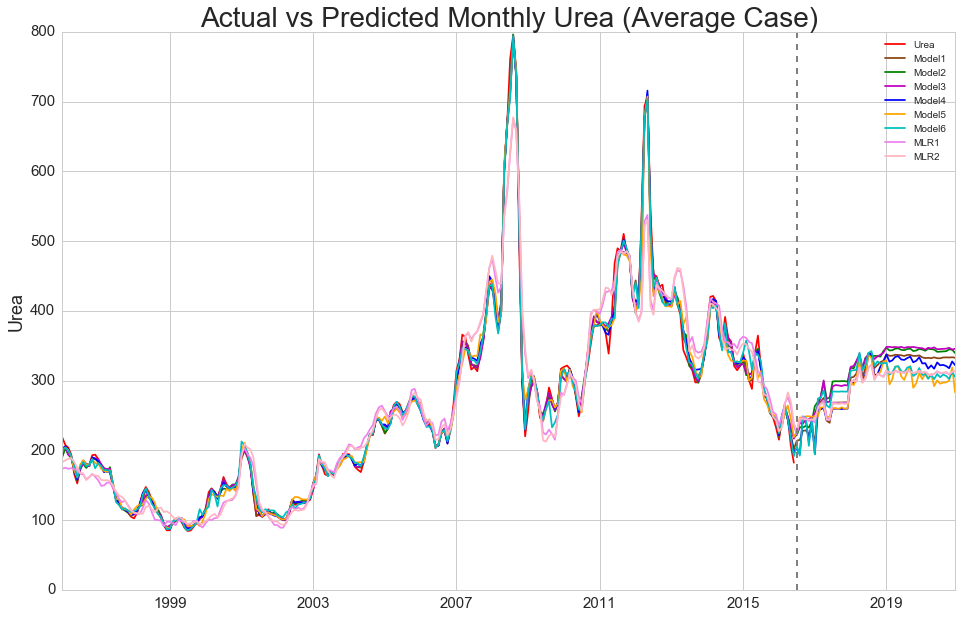

In [89]:
combined['Date'] = pd.to_datetime(combined['Date'])
date = combined['Date']
combined.index = combined['Date'].values
combined = combined.drop(['Date'],axis=1)
combined = combined.convert_objects(convert_numeric=True)
combined = combined.resample('MS',how='mean')
y1 = (combined['Urea'])
y2 = (combined['Model1'])
y3 = (combined['Model2'])
y4 = (combined['Model3'])
y5 = (combined['Model4'])
y6 = (combined['Model5'])
y7 = (combined['Model6'])
y8 = (combined['MLR1'])
y9 = (combined['MLR2'])
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.plot(y1,'r')
ax.plot(y2,'saddlebrown')
ax.plot(y3,'g')
ax.plot(y4,'m')
ax.plot(y5,'b')
ax.plot(y6,'orange')
ax.plot(y7,'c')
ax.plot(y8,'violet')
ax.plot(y9,'lightpink')
plt.axvline(x='2016-07-01', ymin=0, linewidth=2, color='gray',linestyle = '--')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly Urea (Average Case)', size=(28))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea',size=(18))
plt.show()

## Best Case
[Top](#table-of-contents)

In [90]:
#libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels import regression
import math
from matplotlib.ticker import MaxNLocator
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

In [91]:
data = pd.read_csv("C:/Users/msteinme/Documents/ureaUANjunebest.csv")
df_96on = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN','Urea']][0:1069]
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.tail(2)
#1/5/1996 - 6/24/2016

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,Urea
1067,2016-06-17,94.21,48.56,442.75,52.55,2.67,371191,1048312,169.92,185.0
1068,2016-06-24,95.45,48.31,389.00,52.90,2.69,371191,1048312,165.12,182.0


### MLR Models Best
[Top](#table-of-contents)

In [92]:
# mlr1 top 3 of forward
featured_cols_top3 = ['Dollar','Urea_Inventory','UAN']
X7 = df_96on[featured_cols_top3]
y7 = df_96on['Urea']
trainX7, testX7, trainY7, testY7 = train_test_split(X7,y7,test_size=0.3)
lm7 = LinearRegression()
lm7.fit(trainX7,trainY7)
zip(featured_cols_top3,lm7.coef_)

In [93]:
# mlr2 top 2 of forward
featured_cols_top2 = ['Dollar','UAN']
X8 = df_96on[featured_cols_top2]
y8 = df_96on['Urea']
trainX8, testX8, trainY8, testY8 = train_test_split(X8,y8,test_size=0.3)
lm8 = LinearRegression()
lm8.fit(trainX8,trainY8)
zip(featured_cols_top2,lm8.coef_)

### RDF Models Best
[Top](#table-of-contents)

In [94]:
#model 1
X1 = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN']].values
y1 = df_96on['Urea'].values
X_train1, X_test1, y_train1, y_test1= train_test_split(X1,y1,test_size=0.3,random_state=1)
forest1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1.fit(X_train1, y_train1)
y_train_pred1= forest1.predict(X_train1)
y_test_pred1= forest1.predict(X_test1)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1, y_train_pred1),mean_squared_error(y_test1, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1, y_train_pred1),r2_score(y_test1,y_test_pred1)))
print(forest1.feature_importances_)

MSE train: 52.539, test: 380.605
R^2 train: 0.997, test: 0.979
[ 0.00922031  0.04133335  0.0265708   0.07173224  0.01397588  0.00819821
  0.00438399  0.82458522]


In [95]:
#model 2
X2 = df_96on[['Crude','My_Coal','UAN']].values
y2 = df_96on['Urea'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3,random_state=1)
forest2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2.fit(X_train2, y_train2)
y_train_pred2 = forest2.predict(X_train2)
y_test_pred2 = forest2.predict(X_test2)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2, y_train_pred2),mean_squared_error(y_test2, y_test_pred2)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2, y_train_pred2),r2_score(y_test2,y_test_pred2)))
print(forest2.feature_importances_)

MSE train: 106.506, test: 426.290
R^2 train: 0.994, test: 0.977
[ 0.05876889  0.09664503  0.84458608]


In [96]:
#model 3
X3 = df_96on[['Crude','Corn','My_Coal','UAN']].values
y3 = df_96on['Urea'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3,random_state=1)
forest3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3.fit(X_train3, y_train3)
y_train_pred3 = forest3.predict(X_train3)
y_test_pred3 = forest3.predict(X_test3)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3, y_train_pred3),mean_squared_error(y_test3, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3, y_train_pred3),r2_score(y_test3,y_test_pred3)))
print(forest3.feature_importances_)

MSE train: 94.693, test: 424.397
R^2 train: 0.995, test: 0.977
[ 0.04431782  0.03534379  0.08905907  0.83127932]


In [97]:
#model 4
X4 = df_96on[['Dollar','Urea_Inventory','UAN']].values
y4 = df_96on['Urea'].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.3,random_state=1)
forest4 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4.fit(X_train4, y_train4)
y_train_pred4 = forest4.predict(X_train4)
y_test_pred4 = forest4.predict(X_test4)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4, y_train_pred4),mean_squared_error(y_test4, y_test_pred4)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4, y_train_pred4),r2_score(y_test4,y_test_pred4)))
print(forest4.feature_importances_)

MSE train: 113.572, test: 409.854
R^2 train: 0.994, test: 0.978
[ 0.03016733  0.02276575  0.94706692]


In [98]:
#model 5
X5 = df_96on[['Dollar','UAN']].values
y5 = df_96on['Urea'].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.3,random_state=1)
forest5 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest5.fit(X_train5, y_train5)
y_train_pred5 = forest5.predict(X_train5)
y_test_pred5 = forest5.predict(X_test5)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train5, y_train_pred5),mean_squared_error(y_test5, y_test_pred5)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train5, y_train_pred5),r2_score(y_test5,y_test_pred5)))
print(forest5.feature_importances_)

MSE train: 284.947, test: 654.165
R^2 train: 0.984, test: 0.965
[ 0.04066384  0.95933616]


In [99]:
#model 6
X6 = df_96on[['Gas','Urea_Inventory','UAN']].values
y6 = df_96on['Urea'].values
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6,y6,test_size=0.3,random_state=1)
forest6 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest6.fit(X_train6, y_train6)
y_train_pred6 = forest6.predict(X_train6)
y_test_pred6 = forest6.predict(X_test6)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train6, y_train_pred6),mean_squared_error(y_test6, y_test_pred6)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train6, y_train_pred6),r2_score(y_test6,y_test_pred6)))
print(forest6.feature_importances_)

MSE train: 99.873, test: 563.999
R^2 train: 0.995, test: 0.969
[ 0.02671248  0.02493868  0.94834883]


In [100]:
# comparing models that will be used
model1 = forest1.predict(X1)
model2 = forest2.predict(X2)
model3 = forest3.predict(X3)
model4 = forest4.predict(X4)
model5 = forest5.predict(X5)
model6 = forest6.predict(X6)
mlr1 = lm7.predict(X7)
mlr2 = lm8.predict(X8)
model1 = pd.DataFrame(model1)
model2 = pd.DataFrame(model2)
model3 = pd.DataFrame(model3)
model4 = pd.DataFrame(model4)
model5 = pd.DataFrame(model5)
model6 = pd.DataFrame(model6)
mlr1 = pd.DataFrame(mlr1)
mlr2 = pd.DataFrame(mlr2)
df_96on['MLR1'] = mlr1
df_96on['MLR2'] = mlr2
df_96on['Model1'] = model1
df_96on['Model2'] = model2
df_96on['Model3'] = model3
df_96on['Model4'] = model4
df_96on['Model5'] = model5
df_96on['Model6'] = model6
df_96on.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,Urea,MLR1,MLR2,Model1,Model2,Model3,Model4,Model5,Model6
0,1996-01-05,85.06,19.65,369.75,25.36,2.42,589899,1271053,114.00,220.0,172.375439,181.296840,207.826831,203.220252,204.196526,216.588000,216.151270,208.141717
1,1996-01-12,85.06,17.98,366.25,25.27,2.22,589899,1271053,114.96,220.0,173.504703,182.486633,209.371920,202.057262,210.122222,217.874667,216.534603,204.064662
2,1996-01-19,86.75,18.25,365.00,29.07,1.96,589899,1271053,114.96,218.0,171.498232,180.251198,199.924469,186.969744,199.885103,203.175177,201.200293,200.434412


### Predictions Part Best
[Top](#table-of-contents)

In [101]:
#predictions section 7/1/2016 - 12/25/2020
newpred = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN']][1069:1304]
newpred1 = data [['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN']][1069:1304] #goes with model 1 and mlr1
newpred2 = data[['Crude','My_Coal','UAN']][1069:1304] #goes with model 2
newpred3 = data[['Crude','Corn','My_Coal','UAN']][1069:1304] #goes with model 3
newpred4 = data[['Dollar','Urea_Inventory','UAN']][1069:1304] #goes with model 4
newpred5 = data[['Dollar','UAN']][1069:1304]  #goes with model 5
newpred6 = data [['Gas','Urea_Inventory','UAN']][1069:1304] #goes with model6
newpred7 = data[['Dollar','Urea_Inventory','UAN']][1069:1304]#goes with mlr1
newpred8 = data[['Dollar','UAN']][1069:1304]#goes with mlr2
newpred.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN
1069,7/1/2016,95.65,49.65,360.00,58.15,2.98,395415,1186900,142.080000
1070,7/8/2016,96.30,46.12,355.00,59.25,2.79,395415,1186900,142.080000
1071,7/15/2016,94.06,48.48,402.54,53.79,2.76,395415,1186900,193.966557


In [102]:
newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN'] #all variables used except urea
newpred['Date'] = pd.to_datetime(newpred['Date'])
print(newpred.dtypes)
newpred

Date              datetime64[ns]
Dollar                    object
Crude                     object
Corn                      object
My_Coal                   object
Gas                       object
Urea_Inventory            object
UAN_Inventory             object
UAN                       object
dtype: object


,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN
0,2016-07-01,95.65,49.65,360,58.15,2.98,395415,1186900,142.08
1,2016-07-08,96.3,46.12,355,59.25,2.79,395415,1186900,142.08
2,2016-07-15,94.06,48.48,402.54,53.79,2.76,395415,1186900,193.967
3,2016-07-22,92.51,48.64,396.62,54.73,2.72,395415,1186900,252.023
4,2016-07-29,93.53,49.1,389.17,54.06,2.81,395415,1186900,205.838
5,2016-08-05,93.57,48.8,405.67,55.42,2.87,381487,1250760,233.795
6,2016-08-12,93.25,48.78,398.79,55.27,2.71,381487,1250760,239.551
7,2016-08-19,93.99,49.36,409.9,55.43,2.89,381487,1250760,233.134
8,2016-08-26,94.8,48.94,405.38,53.21,2.77,381487,1250760,180.416
9,2016-09-02,94.05,50.85,409.87,54.67,2.79,277461,1258240,234.438


In [103]:
#model 1, 2, 3, 4, 5, 6 and mLR models
newpred_predicted1 = forest1.predict(newpred1)
df_new_pred1 = pd.DataFrame(newpred_predicted1)
newpred['Model1'] = df_new_pred1
newpred_predicted2 = forest2.predict(newpred2)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred['Model2'] = df_new_pred2
newpred_predicted3 = forest3.predict(newpred3)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Model3'] = df_new_pred3
newpred_predicted4 = forest4.predict(newpred4)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred['Model4'] = df_new_pred4
newpred_predicted5 = forest5.predict(newpred5)
df_new_pred5 = pd.DataFrame(newpred_predicted5)
newpred['Model5'] = df_new_pred5
newpred_predicted6 = forest6.predict(newpred6)
df_new_pred6 = pd.DataFrame(newpred_predicted6)
newpred['Model6'] = df_new_pred6
newpred_predicted7 = lm7.predict(newpred7)
df_new_pred7 = pd.DataFrame(newpred_predicted7)
newpred['MLR1'] = df_new_pred7
newpred_predicted8 = lm8.predict(newpred8)
df_new_pred8 = pd.DataFrame(newpred_predicted8)
newpred['MLR2'] = df_new_pred8
newpred.head(2)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
0,2016-07-01,95.65,49.65,360,58.15,2.98,395415,1186900,142.08,207.018207,206.714555,203.196939,185.211574,203.908056,228.760953,203.663133,202.090429
1,2016-07-08,96.3,46.12,355,59.25,2.79,395415,1186900,142.08,204.541104,208.261214,200.391199,185.693035,204.469723,228.762203,202.891413,201.230647


In [104]:
frames = [df_96on,newpred]
combined = pd.concat(frames)
combined.tail(2)

,Corn,Crude,Date,Dollar,Gas,MLR1,MLR2,Model1,Model2,Model3,Model4,Model5,Model6,My_Coal,UAN,UAN_Inventory,Urea,Urea_Inventory
233,420,83.02,2020-12-18,87.13,3.9,335.197118,335.688775,326.571529,336.633819,339.421263,332.919566,331.366764,337.395818,67,240.782,900000,NaN,300000
234,420,88,2020-12-25,86.9,3.86,335.463735,335.986207,328.540334,345.897315,346.445203,332.963900,331.453431,336.691234,67,240.777,900000,NaN,300000


In [105]:
combined = combined[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN','Urea','Model1','Model2','Model3','Model4','Model5','Model6','MLR1','MLR2']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN','Urea','Model1','Model2','Model3','Model4','Model5','Model6','MLR1','MLR2']
combined

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,Urea,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
0,1996-01-05 00:00:00,85.06,19.65,369.75,25.36,2.42,589899,1271053,114,220,207.827,203.22,204.197,216.588,216.151,208.142,172.375,181.297
1,1996-01-12 00:00:00,85.06,17.98,366.25,25.27,2.22,589899,1271053,114.96,220,209.372,202.057,210.122,217.875,216.535,204.065,173.505,182.487
2,1996-01-19 00:00:00,86.75,18.25,365,29.07,1.96,589899,1271053,114.96,218,199.924,186.97,199.885,203.175,201.2,200.434,171.498,180.251
3,1996-01-26 00:00:00,87.64,17.36,360.25,29.2,1.95,589899,1271053,115.6,215,184.65,183.159,196.028,172.553,173.4,190.439,171.194,179.867
4,1996-02-02 00:00:00,87.01,17.38,370.5,32.11,2.08,609091,1360395,117.2,205,203.395,198.426,202.196,203.148,201.843,202.676,172.756,182.683
5,1996-02-09 00:00:00,86.87,17.38,367.25,28.67,2.24,609091,1360395,117.2,205,205.232,203.615,205.057,203.821,202.53,203.807,172.922,182.869
6,1996-02-16 00:00:00,85.91,18.4,382.75,28.17,2.17,609091,1360395,117.2,210,203.343,201.909,201.14,204.06,202.798,203.112,174.062,184.138
7,1996-02-23 00:00:00,85.43,18.45,383.5,28.83,2.26,609091,1360395,117.2,210,207.001,203.127,204.285,211.243,209.683,203.103,174.632,184.773
8,1996-03-01 00:00:00,86.49,18.62,386.75,27.86,2.06,681818,1523421,117.2,210,201.428,198.709,198.067,202.047,201.445,201.309,169.323,183.371
9,1996-03-08 00:00:00,86.81,18.87,388.5,26.51,2.05,681818,1523421,117.2,205,200.383,188.441,190.413,203.67,202.867,201.309,168.943,182.948


In [106]:
combined.to_csv("C:/Users/msteinme/Documents/Ureajunebestresults1.csv")

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


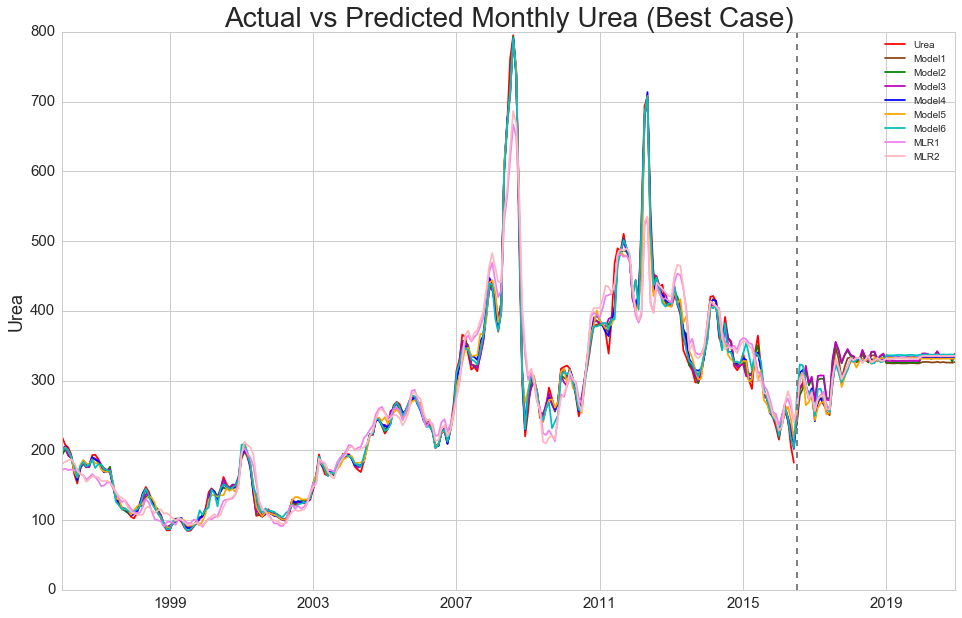

In [107]:
combined['Date'] = pd.to_datetime(combined['Date'])
date = combined['Date']
combined.index = combined['Date'].values
combined = combined.drop(['Date'],axis=1)
combined = combined.convert_objects(convert_numeric=True)
combined = combined.resample('MS',how='mean')
y1 = (combined['Urea'])
y2 = (combined['Model1'])
y3 = (combined['Model2'])
y4 = (combined['Model3'])
y5 = (combined['Model4'])
y6 = (combined['Model5'])
y7 = (combined['Model6'])
y8 = (combined['MLR1'])
y9 = (combined['MLR2'])
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.plot(y1,'r')
ax.plot(y2,'saddlebrown')
ax.plot(y3,'g')
ax.plot(y4,'m')
ax.plot(y5,'b')
ax.plot(y6,'orange')
ax.plot(y7,'c')
ax.plot(y8,'violet')
ax.plot(y9,'lightpink')
plt.axvline(x='2016-07-01', ymin=0, linewidth=2, color='gray',linestyle = '--')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly Urea (Best Case)', size=(28))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea',size=(18))
plt.show()

## Worst Case
[Top](#table-of-contents)

In [108]:
#libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels import regression
import math
from matplotlib.ticker import MaxNLocator
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

In [109]:
data = pd.read_csv("C:/Users/msteinme/Documents/ureaUANjuneworst.csv")
df_96on = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN','Urea']][0:1069]
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.tail(2)
#1/5/1996 - 6/24/2016

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,Urea
1067,2016-06-17,94.21,48.56,442.75,52.55,2.67,618651,1048312,169.92,185.0
1068,2016-06-24,95.45,48.31,389.00,52.90,2.69,618651,1048312,165.12,182.0


### MLR Models Worst
[Top](#table-of-contents)

In [110]:
# mlr1 top 3 of forward
featured_cols_top3 = ['Dollar','Urea_Inventory','UAN']
X7 = df_96on[featured_cols_top3]
y7 = df_96on['Urea']
trainX7, testX7, trainY7, testY7 = train_test_split(X7,y7,test_size=0.3)
lm7 = LinearRegression()
lm7.fit(trainX7,trainY7)
zip(featured_cols_top3,lm7.coef_)

In [111]:
# mlr2 top 2 of forward
featured_cols_top2 = ['Dollar','UAN']
X8 = df_96on[featured_cols_top2]
y8 = df_96on['Urea']
trainX8, testX8, trainY8, testY8 = train_test_split(X8,y8,test_size=0.3)
lm8 = LinearRegression()
lm8.fit(trainX8,trainY8)
zip(featured_cols_top2,lm8.coef_)

### RDF Models Worst
[Top](#table-of-contents)

In [112]:
#model 1
X1 = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN']].values
y1 = df_96on['Urea'].values
X_train1, X_test1, y_train1, y_test1= train_test_split(X1,y1,test_size=0.3,random_state=1)
forest1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1.fit(X_train1, y_train1)
y_train_pred1= forest1.predict(X_train1)
y_test_pred1= forest1.predict(X_test1)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1, y_train_pred1),mean_squared_error(y_test1, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1, y_train_pred1),r2_score(y_test1,y_test_pred1)))
print(forest1.feature_importances_)

MSE train: 50.134, test: 379.015
R^2 train: 0.997, test: 0.979
[ 0.00874497  0.04118709  0.02620188  0.0729033   0.0141522   0.00842091
  0.00457962  0.82381003]


In [113]:
#model 2
X2 = df_96on[['Crude','My_Coal','UAN']].values
y2 = df_96on['Urea'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3,random_state=1)
forest2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2.fit(X_train2, y_train2)
y_train_pred2 = forest2.predict(X_train2)
y_test_pred2 = forest2.predict(X_test2)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2, y_train_pred2),mean_squared_error(y_test2, y_test_pred2)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2, y_train_pred2),r2_score(y_test2,y_test_pred2)))
print(forest2.feature_importances_)

MSE train: 103.939, test: 441.806
R^2 train: 0.994, test: 0.976
[ 0.06156422  0.09656318  0.8418726 ]


In [114]:
#model 3
X3 = df_96on[['Crude','Corn','My_Coal','UAN']].values
y3 = df_96on['Urea'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3,random_state=1)
forest3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3.fit(X_train3, y_train3)
y_train_pred3 = forest3.predict(X_train3)
y_test_pred3 = forest3.predict(X_test3)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3, y_train_pred3),mean_squared_error(y_test3, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3, y_train_pred3),r2_score(y_test3,y_test_pred3)))
print(forest3.feature_importances_)

MSE train: 90.305, test: 432.680
R^2 train: 0.995, test: 0.977
[ 0.04931712  0.03420614  0.08474878  0.83172796]


In [115]:
#model 4
X4 = df_96on[['Dollar','Urea_Inventory','UAN']].values
y4 = df_96on['Urea'].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.3,random_state=1)
forest4 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4.fit(X_train4, y_train4)
y_train_pred4 = forest4.predict(X_train4)
y_test_pred4 = forest4.predict(X_test4)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4, y_train_pred4),mean_squared_error(y_test4, y_test_pred4)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4, y_train_pred4),r2_score(y_test4,y_test_pred4)))
print(forest4.feature_importances_)

MSE train: 119.800, test: 429.442
R^2 train: 0.993, test: 0.977
[ 0.02934793  0.0238153   0.94683676]


In [116]:
#model 5
X5 = df_96on[['Dollar','UAN']].values
y5 = df_96on['Urea'].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.3,random_state=1)
forest5 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest5.fit(X_train5, y_train5)
y_train_pred5 = forest5.predict(X_train5)
y_test_pred5 = forest5.predict(X_test5)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train5, y_train_pred5),mean_squared_error(y_test5, y_test_pred5)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train5, y_train_pred5),r2_score(y_test5,y_test_pred5)))
print(forest5.feature_importances_)

MSE train: 287.808, test: 631.604
R^2 train: 0.984, test: 0.966
[ 0.04123326  0.95876674]


In [117]:
#model 6
X6 = df_96on[['Gas','Urea_Inventory','UAN']].values
y6 = df_96on['Urea'].values
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6,y6,test_size=0.3,random_state=1)
forest6 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest6.fit(X_train6, y_train6)
y_train_pred6 = forest6.predict(X_train6)
y_test_pred6 = forest6.predict(X_test6)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train6, y_train_pred6),mean_squared_error(y_test6, y_test_pred6)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train6, y_train_pred6),r2_score(y_test6,y_test_pred6)))
print(forest6.feature_importances_)

MSE train: 100.615, test: 562.611
R^2 train: 0.994, test: 0.970
[ 0.02648888  0.02579073  0.94772039]


In [118]:
# comparing models that will be used
model1 = forest1.predict(X1)
model2 = forest2.predict(X2)
model3 = forest3.predict(X3)
model4 = forest4.predict(X4)
model5 = forest5.predict(X5)
model6 = forest6.predict(X6)
mlr1 = lm7.predict(X7)
mlr2 = lm8.predict(X8)
model1 = pd.DataFrame(model1)
model2 = pd.DataFrame(model2)
model3 = pd.DataFrame(model3)
model4 = pd.DataFrame(model4)
model5 = pd.DataFrame(model5)
model6 = pd.DataFrame(model6)
mlr1 = pd.DataFrame(mlr1)
mlr2 = pd.DataFrame(mlr2)
df_96on['MLR1'] = mlr1
df_96on['MLR2'] = mlr2
df_96on['Model1'] = model1
df_96on['Model2'] = model2
df_96on['Model3'] = model3
df_96on['Model4'] = model4
df_96on['Model5'] = model5
df_96on['Model6'] = model6
df_96on.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,Urea,MLR1,MLR2,Model1,Model2,Model3,Model4,Model5,Model6
0,1996-01-05,85.06,19.65,369.75,25.36,2.42,589899,1271053,114.00,220.0,173.707312,180.181200,209.423384,203.241126,206.100456,216.980000,216.623722,205.893756
1,1996-01-12,85.06,17.98,366.25,25.27,2.22,589899,1271053,114.96,220.0,174.829566,181.377955,210.454000,205.405000,206.013214,217.406667,217.030389,200.356706
2,1996-01-19,86.75,18.25,365.00,29.07,1.96,589899,1271053,114.96,218.0,172.637682,179.216012,201.562450,193.794274,197.886623,200.165079,201.008629,198.373182


### Predictions Part Worst
[Top](#table-of-contents)

In [119]:
#predictions section 7/1/2016 - 12/25/2020
newpred = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN']][1069:1304]
newpred1 = data [['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN']][1069:1304] #goes with model 1 and mlr1
newpred2 = data[['Crude','My_Coal','UAN']][1069:1304] #goes with model 2
newpred3 = data[['Crude','Corn','My_Coal','UAN']][1069:1304] #goes with model 3
newpred4 = data[['Dollar','Urea_Inventory','UAN']][1069:1304] #goes with model 4
newpred5 = data[['Dollar','UAN']][1069:1304]  #goes with model 5
newpred6 = data [['Gas','Urea_Inventory','UAN']][1069:1304] #goes with model6
newpred7 = data[['Dollar','Urea_Inventory','UAN']][1069:1304]#goes with mlr1
newpred8 = data[['Dollar','UAN']][1069:1304]#goes with mlr2
newpred.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN
1069,7/1/2016,95.65,49.65,360.00,58.15,2.98,659025,1186900,142.080000
1070,7/8/2016,96.30,46.12,355.00,59.25,2.79,659025,1186900,142.080000
1071,7/15/2016,98.65,45.51,376.97,52.74,2.50,659025,1186900,179.286314


In [120]:
newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN'] #all variables used except urea
newpred['Date'] = pd.to_datetime(newpred['Date'])
print(newpred.dtypes)
newpred

Date              datetime64[ns]
Dollar                    object
Crude                     object
Corn                      object
My_Coal                   object
Gas                       object
Urea_Inventory            object
UAN_Inventory             object
UAN                       object
dtype: object


,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN
0,2016-07-01,95.65,49.65,360,58.15,2.98,659025,1186900,142.08
1,2016-07-08,96.3,46.12,355,59.25,2.79,659025,1186900,142.08
2,2016-07-15,98.65,45.51,376.97,52.74,2.5,659025,1186900,179.286
3,2016-07-22,96.01,46.24,345.11,52.65,2.31,659025,1186900,159.989
4,2016-07-29,97.95,46.63,355.82,52.85,2.67,659025,1186900,166.762
5,2016-08-05,99.41,43.36,370.12,51.94,2.38,635811,1250760,176.984
6,2016-08-12,96.62,41.82,362.94,52.59,2.47,635811,1250760,175.202
7,2016-08-19,98.64,40.33,362.27,52.81,2.31,635811,1250760,175.916
8,2016-08-26,98.32,46.34,362.38,52.68,2.69,635811,1250760,175.747
9,2016-09-02,98.1,46.91,380.22,51.93,2.6,462435,1258240,179.212


In [121]:
#model 1, 2, 3, 4, 5, 6 and mLR models
newpred_predicted1 = forest1.predict(newpred1)
df_new_pred1 = pd.DataFrame(newpred_predicted1)
newpred['Model1'] = df_new_pred1
newpred_predicted2 = forest2.predict(newpred2)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred['Model2'] = df_new_pred2
newpred_predicted3 = forest3.predict(newpred3)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Model3'] = df_new_pred3
newpred_predicted4 = forest4.predict(newpred4)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred['Model4'] = df_new_pred4
newpred_predicted5 = forest5.predict(newpred5)
df_new_pred5 = pd.DataFrame(newpred_predicted5)
newpred['Model5'] = df_new_pred5
newpred_predicted6 = forest6.predict(newpred6)
df_new_pred6 = pd.DataFrame(newpred_predicted6)
newpred['Model6'] = df_new_pred6
newpred_predicted7 = lm7.predict(newpred7)
df_new_pred7 = pd.DataFrame(newpred_predicted7)
newpred['MLR1'] = df_new_pred7
newpred_predicted8 = lm8.predict(newpred8)
df_new_pred8 = pd.DataFrame(newpred_predicted8)
newpred['MLR2'] = df_new_pred8
newpred.head(2)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
0,2016-07-01,95.65,49.65,360,58.15,2.98,659025,1186900,142.08,207.738978,207.399145,206.549863,189.455598,200.350455,169.305765,189.383633,201.638968
1,2016-07-08,96.3,46.12,355,59.25,2.79,659025,1186900,142.08,203.604395,208.647474,204.534622,189.630304,200.970424,171.111599,188.540601,200.807451


In [122]:
frames = [df_96on,newpred]
combined = pd.concat(frames)
combined.tail(2)

,Corn,Crude,Date,Dollar,Gas,MLR1,MLR2,Model1,Model2,Model3,Model4,Model5,Model6,My_Coal,UAN,UAN_Inventory,Urea,Urea_Inventory
233,400.2,49.9,2020-12-18,99.25,2.92,237.599061,245.052036,218.079405,235.991190,234.019868,216.574431,246.071612,227.086316,50.91,180.599,1200000,NaN,500000
234,403,53.9,2020-12-25,95.6,2.99,241.741511,249.090556,227.067254,271.288031,276.362890,217.125556,226.544926,227.086316,51.3,180.093,1200000,NaN,500000


In [123]:
combined = combined[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN','Urea','Model1','Model2','Model3','Model4','Model5','Model6','MLR1','MLR2']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN','Urea','Model1','Model2','Model3','Model4','Model5','Model6','MLR1','MLR2']
combined

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,Urea,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
0,1996-01-05 00:00:00,85.06,19.65,369.75,25.36,2.42,589899,1271053,114,220,209.423,203.241,206.1,216.98,216.624,205.894,173.707,180.181
1,1996-01-12 00:00:00,85.06,17.98,366.25,25.27,2.22,589899,1271053,114.96,220,210.454,205.405,206.013,217.407,217.03,200.357,174.83,181.378
2,1996-01-19 00:00:00,86.75,18.25,365,29.07,1.96,589899,1271053,114.96,218,201.562,193.794,197.887,200.165,201.009,198.373,172.638,179.216
3,1996-01-26 00:00:00,87.64,17.36,360.25,29.2,1.95,589899,1271053,115.6,215,186.633,189.289,191.243,174.372,178.654,192.148,172.232,178.875
4,1996-02-02 00:00:00,87.01,17.38,370.5,32.11,2.08,609091,1360395,117.2,205,203.993,201.789,202.839,201.932,201.542,202.522,173.971,181.676
5,1996-02-09 00:00:00,86.87,17.38,367.25,28.67,2.24,609091,1360395,117.2,205,204.48,206.044,204.455,202.612,202.427,203.159,174.153,181.855
6,1996-02-16 00:00:00,85.91,18.4,382.75,28.17,2.17,609091,1360395,117.2,210,204.452,204.689,202.901,203.6,203.553,202.385,175.398,183.083
7,1996-02-23 00:00:00,85.43,18.45,383.5,28.83,2.26,609091,1360395,117.2,210,206.812,205.527,205.304,210.831,210.022,203.349,176.02,183.697
8,1996-03-01 00:00:00,86.49,18.62,386.75,27.86,2.06,681818,1523421,117.2,210,203.065,202.833,200.223,203.471,202.001,202.713,171.053,182.341
9,1996-03-08 00:00:00,86.81,18.87,388.5,26.51,2.05,681818,1523421,117.2,205,201.006,191.173,188.796,203.724,202.427,202.631,170.638,181.932


In [124]:
combined.to_csv("C:/Users/msteinme/Documents/Ureajuneworstresults1.csv")

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


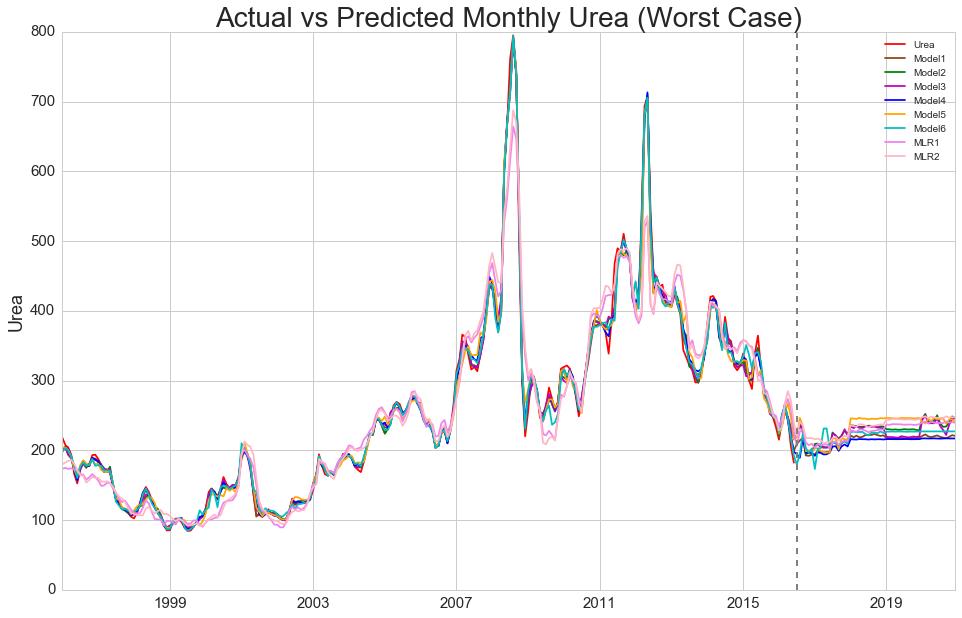

In [125]:
combined['Date'] = pd.to_datetime(combined['Date'])
date = combined['Date']
combined.index = combined['Date'].values
combined = combined.drop(['Date'],axis=1)
combined = combined.convert_objects(convert_numeric=True)
combined = combined.resample('MS',how='mean')
y1 = (combined['Urea'])
y2 = (combined['Model1'])
y3 = (combined['Model2'])
y4 = (combined['Model3'])
y5 = (combined['Model4'])
y6 = (combined['Model5'])
y7 = (combined['Model6'])
y8 = (combined['MLR1'])
y9 = (combined['MLR2'])
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.plot(y1,'r')
ax.plot(y2,'saddlebrown')
ax.plot(y3,'g')
ax.plot(y4,'m')
ax.plot(y5,'b')
ax.plot(y6,'orange')
ax.plot(y7,'c')
ax.plot(y8,'violet')
ax.plot(y9,'lightpink')
plt.axvline(x='2016-07-01', ymin=0, linewidth=2, color='gray',linestyle = '--')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly Urea (Worst Case)', size=(28))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea',size=(18))
plt.show()

# Using Model 5 UAN
## Average Case Model 5
[Top](#table-of-contents)

In [1]:
#libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels import regression
import math
from matplotlib.ticker import MaxNLocator
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

In [2]:
data = pd.read_csv("C:/Users/msteinme/Documents/ureaUANjuneavg.csv")
df_96on = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2','Urea']][0:1069]
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.tail(2)
#1/5/1996 - 6/24/2016

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Urea
1067,2016-06-17,94.21,48.56,442.75,52.55,2.67,494921,1048312,169.92,185.0
1068,2016-06-24,95.45,48.31,389.00,52.90,2.69,494921,1048312,165.12,182.0


### MLR Models Avg Model 5
[Top](#table-of-contents)

In [3]:
# mlr1 top 3 of forward
featured_cols_top3 = ['Dollar','Urea_Inventory','UAN2']
X7 = df_96on[featured_cols_top3]
y7 = df_96on['Urea']
trainX7, testX7, trainY7, testY7 = train_test_split(X7,y7,test_size=0.3)
lm7 = LinearRegression()
lm7.fit(trainX7,trainY7)
zip(featured_cols_top3,lm7.coef_)

In [4]:
# mlr2 top 2 of forward
featured_cols_top2 = ['Dollar','UAN2']
X8 = df_96on[featured_cols_top2]
y8 = df_96on['Urea']
trainX8, testX8, trainY8, testY8 = train_test_split(X8,y8,test_size=0.3)
lm8 = LinearRegression()
lm8.fit(trainX8,trainY8)
zip(featured_cols_top2,lm8.coef_)

### RDF Models Model 5
[Top](#table-of-contents)

In [5]:
#model 1
X1 = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2']].values
y1 = df_96on['Urea'].values
X_train1, X_test1, y_train1, y_test1= train_test_split(X1,y1,test_size=0.3,random_state=1)
forest1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1.fit(X_train1, y_train1)
y_train_pred1= forest1.predict(X_train1)
y_test_pred1= forest1.predict(X_test1)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1, y_train_pred1),mean_squared_error(y_test1, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1, y_train_pred1),r2_score(y_test1,y_test_pred1)))
print(forest1.feature_importances_)

MSE train: 55.115, test: 394.836
R^2 train: 0.997, test: 0.979
[ 0.00921459  0.04341936  0.02444122  0.07049717  0.01404934  0.00819447
  0.00449433  0.82568952]


In [6]:
#model 2
X2 = df_96on[['Crude','My_Coal','UAN2']].values
y2 = df_96on['Urea'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3,random_state=1)
forest2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2.fit(X_train2, y_train2)
y_train_pred2 = forest2.predict(X_train2)
y_test_pred2 = forest2.predict(X_test2)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2, y_train_pred2),mean_squared_error(y_test2, y_test_pred2)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2, y_train_pred2),r2_score(y_test2,y_test_pred2)))
print(forest2.feature_importances_)

MSE train: 105.676, test: 442.573
R^2 train: 0.994, test: 0.976
[ 0.0619997   0.09215753  0.84584278]


In [7]:
#model 3
X3 = df_96on[['Crude','Corn','My_Coal','UAN2']].values
y3 = df_96on['Urea'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3,random_state=1)
forest3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3.fit(X_train3, y_train3)
y_train_pred3 = forest3.predict(X_train3)
y_test_pred3 = forest3.predict(X_test3)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3, y_train_pred3),mean_squared_error(y_test3, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3, y_train_pred3),r2_score(y_test3,y_test_pred3)))
print(forest3.feature_importances_)

MSE train: 89.080, test: 417.805
R^2 train: 0.995, test: 0.977
[ 0.04771828  0.0339134   0.08533649  0.83303183]


In [8]:
#model 4
X4 = df_96on[['Dollar','Urea_Inventory','UAN2']].values
y4 = df_96on['Urea'].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.3,random_state=1)
forest4 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4.fit(X_train4, y_train4)
y_train_pred4 = forest4.predict(X_train4)
y_test_pred4 = forest4.predict(X_test4)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4, y_train_pred4),mean_squared_error(y_test4, y_test_pred4)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4, y_train_pred4),r2_score(y_test4,y_test_pred4)))
print(forest4.feature_importances_)

MSE train: 111.447, test: 407.208
R^2 train: 0.994, test: 0.978
[ 0.02942176  0.02340233  0.94717591]


In [9]:
#model 5
X5 = df_96on[['Dollar','UAN2']].values
y5 = df_96on['Urea'].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.3,random_state=1)
forest5 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest5.fit(X_train5, y_train5)
y_train_pred5 = forest5.predict(X_train5)
y_test_pred5 = forest5.predict(X_test5)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train5, y_train_pred5),mean_squared_error(y_test5, y_test_pred5)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train5, y_train_pred5),r2_score(y_test5,y_test_pred5)))
print(forest5.feature_importances_)

MSE train: 292.704, test: 627.891
R^2 train: 0.984, test: 0.966
[ 0.04076752  0.95923248]


In [10]:
#model 6
X6 = df_96on[['Gas','Urea_Inventory','UAN2']].values
y6 = df_96on['Urea'].values
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6,y6,test_size=0.3,random_state=1)
forest6 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest6.fit(X_train6, y_train6)
y_train_pred6 = forest6.predict(X_train6)
y_test_pred6 = forest6.predict(X_test6)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train6, y_train_pred6),mean_squared_error(y_test6, y_test_pred6)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train6, y_train_pred6),r2_score(y_test6,y_test_pred6)))
print(forest6.feature_importances_)

MSE train: 97.709, test: 566.183
R^2 train: 0.995, test: 0.969
[ 0.02693116  0.02613191  0.94693693]


In [11]:
# comparing models that will be used
model1 = forest1.predict(X1)
model2 = forest2.predict(X2)
model3 = forest3.predict(X3)
model4 = forest4.predict(X4)
model5 = forest5.predict(X5)
model6 = forest6.predict(X6)
mlr1 = lm7.predict(X7)
mlr2 = lm8.predict(X8)
model1 = pd.DataFrame(model1)
model2 = pd.DataFrame(model2)
model3 = pd.DataFrame(model3)
model4 = pd.DataFrame(model4)
model5 = pd.DataFrame(model5)
model6 = pd.DataFrame(model6)
mlr1 = pd.DataFrame(mlr1)
mlr2 = pd.DataFrame(mlr2)
df_96on['MLR1'] = mlr1
df_96on['MLR2'] = mlr2
df_96on['Model1'] = model1
df_96on['Model2'] = model2
df_96on['Model3'] = model3
df_96on['Model4'] = model4
df_96on['Model5'] = model5
df_96on['Model6'] = model6
df_96on.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Urea,MLR1,MLR2,Model1,Model2,Model3,Model4,Model5,Model6
0,1996-01-05,85.06,19.65,369.75,25.36,2.42,589899,1271053,114.00,220.0,171.981177,182.731625,206.787419,203.537812,200.165960,215.980000,216.796806,203.463524
1,1996-01-12,85.06,17.98,366.25,25.27,2.22,589899,1271053,114.96,220.0,173.129665,183.912858,208.251167,202.750417,204.961074,215.880000,216.980140,205.133687
2,1996-01-19,86.75,18.25,365.00,29.07,1.96,589899,1271053,114.96,218.0,171.080021,181.568830,199.312222,187.171899,197.593955,202.961111,200.047226,202.696127


### Predictions Part Model 5
[Top](#table-of-contents)

In [12]:
#predictions section 7/1/2016 - 12/25/2020
newpred = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2']][1069:1304]
newpred1 = data [['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2']][1069:1304] #goes with model 1 and mlr1
newpred2 = data[['Crude','My_Coal','UAN2']][1069:1304] #goes with model 2
newpred3 = data[['Crude','Corn','My_Coal','UAN2']][1069:1304] #goes with model 3
newpred4 = data[['Dollar','Urea_Inventory','UAN2']][1069:1304] #goes with model 4
newpred5 = data[['Dollar','UAN2']][1069:1304]  #goes with model 5
newpred6 = data [['Gas','Urea_Inventory','UAN2']][1069:1304] #goes with model6
newpred7 = data[['Dollar','Urea_Inventory','UAN2']][1069:1304]#goes with mlr1
newpred8 = data[['Dollar','UAN2']][1069:1304]#goes with mlr2
newpred.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2
1069,7/1/2016,95.65,49.65,360.00,58.15,2.98,527220,1186900,142.080000
1070,7/8/2016,96.30,46.12,355.00,59.25,2.79,527220,1186900,142.080000
1071,7/15/2016,96.13,48.28,382.31,53.12,2.66,527220,1186900,184.389961


In [13]:
newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2'] #all variables used except urea
newpred['Date'] = pd.to_datetime(newpred['Date'])
print(newpred.dtypes)
newpred

Date              datetime64[ns]
Dollar                    object
Crude                     object
Corn                      object
My_Coal                   object
Gas                       object
Urea_Inventory            object
UAN_Inventory             object
UAN2                      object
dtype: object


,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2
0,2016-07-01,95.65,49.65,360,58.15,2.98,527220,1186900,142.08
1,2016-07-08,96.3,46.12,355,59.25,2.79,527220,1186900,142.08
2,2016-07-15,96.13,48.28,382.31,53.12,2.66,527220,1186900,184.39
3,2016-07-22,95.6,46.81,380.9,53.07,2.51,527220,1186900,184.011
4,2016-07-29,95.77,47.54,381.38,53.08,2.64,527220,1186900,184.1
5,2016-08-05,96.63,46.59,387.16,52.96,2.56,508649,1250760,184.515
6,2016-08-12,96.9,47.22,385.1,53.04,2.59,508649,1250760,183.958
7,2016-08-19,96.04,48.11,381.27,53.02,2.55,508649,1250760,184.548
8,2016-08-26,95.77,47.51,379.14,53.1,2.55,508649,1250760,184.548
9,2016-09-02,96.61,47.38,382.68,53.03,2.62,369948,1258240,184.1


In [14]:
#model 1, 2, 3, 4, 5, 6 and mLR models
newpred_predicted1 = forest1.predict(newpred1)
df_new_pred1 = pd.DataFrame(newpred_predicted1)
newpred['Model1'] = df_new_pred1
newpred_predicted2 = forest2.predict(newpred2)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred['Model2'] = df_new_pred2
newpred_predicted3 = forest3.predict(newpred3)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Model3'] = df_new_pred3
newpred_predicted4 = forest4.predict(newpred4)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred['Model4'] = df_new_pred4
newpred_predicted5 = forest5.predict(newpred5)
df_new_pred5 = pd.DataFrame(newpred_predicted5)
newpred['Model5'] = df_new_pred5
newpred_predicted6 = forest6.predict(newpred6)
df_new_pred6 = pd.DataFrame(newpred_predicted6)
newpred['Model6'] = df_new_pred6
newpred_predicted7 = lm7.predict(newpred7)
df_new_pred7 = pd.DataFrame(newpred_predicted7)
newpred['MLR1'] = df_new_pred7
newpred_predicted8 = lm8.predict(newpred8)
df_new_pred8 = pd.DataFrame(newpred_predicted8)
newpred['MLR2'] = df_new_pred8
newpred.head(2)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
0,2016-07-01,95.65,49.65,360,58.15,2.98,527220,1186900,142.08,208.516390,209.751596,208.489794,194.431065,200.75233,198.959829,195.925801,202.594382
1,2016-07-08,96.3,46.12,355,59.25,2.79,527220,1186900,142.08,203.570701,210.007638,204.381429,194.267731,201.15233,202.559829,195.137477,201.692833


In [15]:
frames = [df_96on,newpred]
combined = pd.concat(frames)
combined.tail(2)

,Corn,Crude,Date,Dollar,Gas,MLR1,MLR2,Model1,Model2,Model3,Model4,Model5,Model6,My_Coal,UAN2,UAN_Inventory,Urea,Urea_Inventory
233,421.59,62.99,2020-12-18,90.81,3.29,301.587110,305.274233,332.884673,350.701164,349.318349,312.152089,308.676186,310.014806,59.1,220.073,1000000,NaN,400000
234,465.75,67.68,2020-12-25,90.8,3.45,298.385228,301.982457,330.442446,347.405565,348.902560,319.295591,311.134472,315.305680,59.15,217.387,1000000,NaN,400000


In [16]:
combined = combined[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2','Urea','Model1','Model2','Model3','Model4','Model5','Model6','MLR1','MLR2']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2','Urea','Model1','Model2','Model3','Model4','Model5','Model6','MLR1','MLR2']
combined

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Urea,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
0,1996-01-05 00:00:00,85.06,19.65,369.75,25.36,2.42,589899,1271053,114,220,206.787,203.538,200.166,215.98,216.797,203.464,171.981,182.732
1,1996-01-12 00:00:00,85.06,17.98,366.25,25.27,2.22,589899,1271053,114.96,220,208.251,202.75,204.961,215.88,216.98,205.134,173.13,183.913
2,1996-01-19 00:00:00,86.75,18.25,365,29.07,1.96,589899,1271053,114.96,218,199.312,187.172,197.594,202.961,200.047,202.696,171.08,181.569
3,1996-01-26 00:00:00,87.64,17.36,360.25,29.2,1.95,589899,1271053,115.6,215,186.989,183.8,197.309,178.51,176.556,195.049,170.766,181.122
4,1996-02-02 00:00:00,87.01,17.38,370.5,32.11,2.08,609091,1360395,117.2,205,203.739,199.33,203.033,203.808,201.358,202.674,172.466,183.964
5,1996-02-09 00:00:00,86.87,17.38,367.25,28.67,2.24,609091,1360395,117.2,205,204.67,204.844,205.804,204.289,202.329,203.656,172.636,184.159
6,1996-02-16 00:00:00,85.91,18.4,382.75,28.17,2.17,609091,1360395,117.2,210,203.755,202.567,203.586,205.001,202.694,202.524,173.8,185.49
7,1996-02-23 00:00:00,85.43,18.45,383.5,28.83,2.26,609091,1360395,117.2,210,206.832,204.336,204.735,210.247,209.721,202.781,174.382,186.156
8,1996-03-01 00:00:00,86.49,18.62,386.75,27.86,2.06,681818,1523421,117.2,210,201.496,199.683,199.479,202.907,202.249,202.105,169.39,184.686
9,1996-03-08 00:00:00,86.81,18.87,388.5,26.51,2.05,681818,1523421,117.2,205,199.36,194.073,191.717,203.764,202.329,201.86,169.002,184.242


In [17]:
combined.to_csv("C:/Users/msteinme/Documents/Ureajuneavgresults2.csv")

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


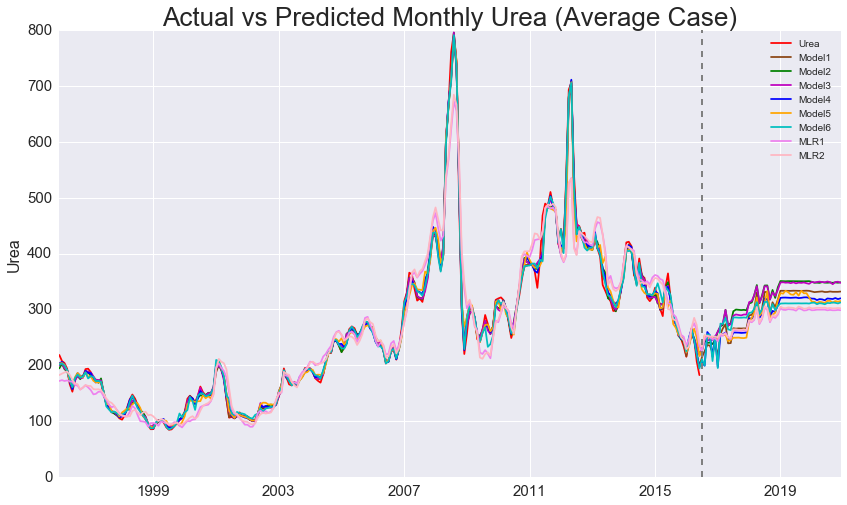

In [18]:
combined['Date'] = pd.to_datetime(combined['Date'])
date = combined['Date']
combined.index = combined['Date'].values
combined = combined.drop(['Date'],axis=1)
combined = combined.convert_objects(convert_numeric=True)
combined = combined.resample('MS',how='mean')
y1 = (combined['Urea'])
y2 = (combined['Model1'])
y3 = (combined['Model2'])
y4 = (combined['Model3'])
y5 = (combined['Model4'])
y6 = (combined['Model5'])
y7 = (combined['Model6'])
y8 = (combined['MLR1'])
y9 = (combined['MLR2'])
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
ax.plot(y1,'r')
ax.plot(y2,'saddlebrown')
ax.plot(y3,'g')
ax.plot(y4,'m')
ax.plot(y5,'b')
ax.plot(y6,'orange')
ax.plot(y7,'c')
ax.plot(y8,'violet')
ax.plot(y9,'lightpink')
plt.axvline(x='2016-07-01', ymin=0, linewidth=2, color='gray',linestyle = '--')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly Urea (Average Case)', size=(26))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea',size=(16))
plt.show()

## Best Case Model 5
[Top](#table-of-contents)

In [19]:
#libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels import regression
import math
from matplotlib.ticker import MaxNLocator
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

In [20]:
data = pd.read_csv("C:/Users/msteinme/Documents/ureaUANjunebest.csv")
df_96on = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2','Urea']][0:1069]
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.tail(2)
#1/5/1996 - 6/24/2016

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Urea
1067,2016-06-17,94.21,48.56,442.75,52.55,2.67,371191,1048312,169.92,185.0
1068,2016-06-24,95.45,48.31,389.00,52.90,2.69,371191,1048312,165.12,182.0


### MLR Models Best Model 5
[Top](#table-of-contents)

In [21]:
# mlr1 top 3 of forward
featured_cols_top3 = ['Dollar','Urea_Inventory','UAN2']
X7 = df_96on[featured_cols_top3]
y7 = df_96on['Urea']
trainX7, testX7, trainY7, testY7 = train_test_split(X7,y7,test_size=0.3)
lm7 = LinearRegression()
lm7.fit(trainX7,trainY7)
zip(featured_cols_top3,lm7.coef_)

In [22]:
# mlr2 top 2 of forward
featured_cols_top2 = ['Dollar','UAN2']
X8 = df_96on[featured_cols_top2]
y8 = df_96on['Urea']
trainX8, testX8, trainY8, testY8 = train_test_split(X8,y8,test_size=0.3)
lm8 = LinearRegression()
lm8.fit(trainX8,trainY8)
zip(featured_cols_top2,lm8.coef_)

### RDF Models Best Model 5
[Top](#table-of-contents)

In [23]:
#model 1
X1 = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2']].values
y1 = df_96on['Urea'].values
X_train1, X_test1, y_train1, y_test1= train_test_split(X1,y1,test_size=0.3,random_state=1)
forest1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1.fit(X_train1, y_train1)
y_train_pred1= forest1.predict(X_train1)
y_test_pred1= forest1.predict(X_test1)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1, y_train_pred1),mean_squared_error(y_test1, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1, y_train_pred1),r2_score(y_test1,y_test_pred1)))
print(forest1.feature_importances_)

MSE train: 55.528, test: 385.415
R^2 train: 0.997, test: 0.979
[ 0.00876546  0.04378582  0.02628943  0.06898229  0.01352855  0.00798975
  0.00487558  0.82578312]


In [24]:
#model 2
X2 = df_96on[['Crude','My_Coal','UAN2']].values
y2 = df_96on['Urea'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3,random_state=1)
forest2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2.fit(X_train2, y_train2)
y_train_pred2 = forest2.predict(X_train2)
y_test_pred2 = forest2.predict(X_test2)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2, y_train_pred2),mean_squared_error(y_test2, y_test_pred2)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2, y_train_pred2),r2_score(y_test2,y_test_pred2)))
print(forest2.feature_importances_)

MSE train: 106.483, test: 443.190
R^2 train: 0.994, test: 0.976
[ 0.06170904  0.09113978  0.84715117]


In [25]:
#model 3
X3 = df_96on[['Crude','Corn','My_Coal','UAN2']].values
y3 = df_96on['Urea'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3,random_state=1)
forest3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3.fit(X_train3, y_train3)
y_train_pred3 = forest3.predict(X_train3)
y_test_pred3 = forest3.predict(X_test3)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3, y_train_pred3),mean_squared_error(y_test3, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3, y_train_pred3),r2_score(y_test3,y_test_pred3)))
print(forest3.feature_importances_)

MSE train: 87.594, test: 439.986
R^2 train: 0.995, test: 0.976
[ 0.05452923  0.03460724  0.08153855  0.82932499]


In [26]:
#model 4
X4 = df_96on[['Dollar','Urea_Inventory','UAN2']].values
y4 = df_96on['Urea'].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.3,random_state=1)
forest4 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4.fit(X_train4, y_train4)
y_train_pred4 = forest4.predict(X_train4)
y_test_pred4 = forest4.predict(X_test4)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4, y_train_pred4),mean_squared_error(y_test4, y_test_pred4)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4, y_train_pred4),r2_score(y_test4,y_test_pred4)))
print(forest4.feature_importances_)

MSE train: 116.296, test: 419.539
R^2 train: 0.994, test: 0.977
[ 0.03168963  0.02217935  0.94613103]


In [27]:
#model 5
X5 = df_96on[['Dollar','UAN2']].values
y5 = df_96on['Urea'].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.3,random_state=1)
forest5 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest5.fit(X_train5, y_train5)
y_train_pred5 = forest5.predict(X_train5)
y_test_pred5 = forest5.predict(X_test5)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train5, y_train_pred5),mean_squared_error(y_test5, y_test_pred5)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train5, y_train_pred5),r2_score(y_test5,y_test_pred5)))
print(forest5.feature_importances_)

MSE train: 281.721, test: 659.098
R^2 train: 0.985, test: 0.964
[ 0.04005666  0.95994334]


In [28]:
#model 6
X6 = df_96on[['Gas','Urea_Inventory','UAN2']].values
y6 = df_96on['Urea'].values
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6,y6,test_size=0.3,random_state=1)
forest6 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest6.fit(X_train6, y_train6)
y_train_pred6 = forest6.predict(X_train6)
y_test_pred6 = forest6.predict(X_test6)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train6, y_train_pred6),mean_squared_error(y_test6, y_test_pred6)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train6, y_train_pred6),r2_score(y_test6,y_test_pred6)))
print(forest6.feature_importances_)

MSE train: 98.683, test: 569.206
R^2 train: 0.995, test: 0.969
[ 0.02716889  0.02519487  0.94763625]


In [29]:
# comparing models that will be used
model1 = forest1.predict(X1)
model2 = forest2.predict(X2)
model3 = forest3.predict(X3)
model4 = forest4.predict(X4)
model5 = forest5.predict(X5)
model6 = forest6.predict(X6)
mlr1 = lm7.predict(X7)
mlr2 = lm8.predict(X8)
model1 = pd.DataFrame(model1)
model2 = pd.DataFrame(model2)
model3 = pd.DataFrame(model3)
model4 = pd.DataFrame(model4)
model5 = pd.DataFrame(model5)
model6 = pd.DataFrame(model6)
mlr1 = pd.DataFrame(mlr1)
mlr2 = pd.DataFrame(mlr2)
df_96on['MLR1'] = mlr1
df_96on['MLR2'] = mlr2
df_96on['Model1'] = model1
df_96on['Model2'] = model2
df_96on['Model3'] = model3
df_96on['Model4'] = model4
df_96on['Model5'] = model5
df_96on['Model6'] = model6
df_96on.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Urea,MLR1,MLR2,Model1,Model2,Model3,Model4,Model5,Model6
0,1996-01-05,85.06,19.65,369.75,25.36,2.42,589899,1271053,114.00,220.0,171.680228,181.383220,210.426360,199.851578,202.588976,216.873333,215.419802,204.901175
1,1996-01-12,85.06,17.98,366.25,25.27,2.22,589899,1271053,114.96,220.0,172.858058,182.564112,211.663861,201.285444,208.220483,217.306667,215.630913,206.611757
2,1996-01-19,86.75,18.25,365.00,29.07,1.96,589899,1271053,114.96,218.0,170.951652,180.259228,201.325615,190.474028,197.429457,201.785397,201.382812,205.553471


### Predictions Part Best Model 5
[Top](#table-of-contents)

In [30]:
#predictions section 7/1/2016 - 12/25/2020
newpred = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2']][1069:1304]
newpred1 = data [['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2']][1069:1304] #goes with model 1 and mlr1
newpred2 = data[['Crude','My_Coal','UAN2']][1069:1304] #goes with model 2
newpred3 = data[['Crude','Corn','My_Coal','UAN2']][1069:1304] #goes with model 3
newpred4 = data[['Dollar','Urea_Inventory','UAN2']][1069:1304] #goes with model 4
newpred5 = data[['Dollar','UAN2']][1069:1304]  #goes with model 5
newpred6 = data [['Gas','Urea_Inventory','UAN2']][1069:1304] #goes with model6
newpred7 = data[['Dollar','Urea_Inventory','UAN2']][1069:1304]#goes with mlr1
newpred8 = data[['Dollar','UAN2']][1069:1304]#goes with mlr2
newpred.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2
1069,7/1/2016,95.65,49.65,360.00,58.15,2.98,395415,1186900,142.080000
1070,7/8/2016,96.30,46.12,355.00,59.25,2.79,395415,1186900,142.080000
1071,7/15/2016,94.06,48.48,402.54,53.79,2.76,395415,1186900,197.511483


In [31]:
newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2'] #all variables used except urea
newpred['Date'] = pd.to_datetime(newpred['Date'])
print(newpred.dtypes)
newpred

Date              datetime64[ns]
Dollar                    object
Crude                     object
Corn                      object
My_Coal                   object
Gas                       object
Urea_Inventory            object
UAN_Inventory             object
UAN2                      object
dtype: object


,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2
0,2016-07-01,95.65,49.65,360,58.15,2.98,395415,1186900,142.08
1,2016-07-08,96.3,46.12,355,59.25,2.79,395415,1186900,142.08
2,2016-07-15,94.06,48.48,402.54,53.79,2.76,395415,1186900,197.511
3,2016-07-22,92.51,48.64,396.62,54.73,2.72,395415,1186900,242.562
4,2016-07-29,93.53,49.1,389.17,54.06,2.81,395415,1186900,203.479
5,2016-08-05,93.57,48.8,405.67,55.42,2.87,381487,1250760,224.873
6,2016-08-12,93.25,48.78,398.79,55.27,2.71,381487,1250760,227.647
7,2016-08-19,93.99,49.36,409.9,55.43,2.89,381487,1250760,224.873
8,2016-08-26,94.8,48.94,405.38,53.21,2.77,381487,1250760,181.865
9,2016-09-02,94.05,50.85,409.87,54.67,2.79,277461,1258240,224.056


In [32]:
#model 1, 2, 3, 4, 5, 6 and mLR models
newpred_predicted1 = forest1.predict(newpred1)
df_new_pred1 = pd.DataFrame(newpred_predicted1)
newpred['Model1'] = df_new_pred1
newpred_predicted2 = forest2.predict(newpred2)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred['Model2'] = df_new_pred2
newpred_predicted3 = forest3.predict(newpred3)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Model3'] = df_new_pred3
newpred_predicted4 = forest4.predict(newpred4)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred['Model4'] = df_new_pred4
newpred_predicted5 = forest5.predict(newpred5)
df_new_pred5 = pd.DataFrame(newpred_predicted5)
newpred['Model5'] = df_new_pred5
newpred_predicted6 = forest6.predict(newpred6)
df_new_pred6 = pd.DataFrame(newpred_predicted6)
newpred['Model6'] = df_new_pred6
newpred_predicted7 = lm7.predict(newpred7)
df_new_pred7 = pd.DataFrame(newpred_predicted7)
newpred['MLR1'] = df_new_pred7
newpred_predicted8 = lm8.predict(newpred8)
df_new_pred8 = pd.DataFrame(newpred_predicted8)
newpred['MLR2'] = df_new_pred8
newpred.head(2)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
0,2016-07-01,95.65,49.65,360,58.15,2.98,395415,1186900,142.08,209.655813,207.070566,205.172997,189.500733,202.814767,235.874171,203.033639,201.481284
1,2016-07-08,96.3,46.12,355,59.25,2.79,395415,1186900,142.08,204.588285,210.474930,199.678358,189.594672,202.954767,235.900600,202.300406,200.594790


In [33]:
frames = [df_96on,newpred]
combined = pd.concat(frames)
combined.tail(2)

,Corn,Crude,Date,Dollar,Gas,MLR1,MLR2,Model1,Model2,Model3,Model4,Model5,Model6,My_Coal,UAN2,UAN_Inventory,Urea,Urea_Inventory
233,420,83.02,2020-12-18,87.13,3.9,334.493137,330.914340,327.923484,337.460633,338.314674,331.920537,332.809510,334.080351,67,237.856,900000,NaN,300000
234,420,88,2020-12-25,86.9,3.86,334.734267,331.209653,329.954501,349.132043,345.655405,331.976370,332.937658,332.363032,67,237.841,900000,NaN,300000


In [34]:
combined = combined[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2','Urea','Model1','Model2','Model3','Model4','Model5','Model6','MLR1','MLR2']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2','Urea','Model1','Model2','Model3','Model4','Model5','Model6','MLR1','MLR2']
combined

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Urea,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
0,1996-01-05 00:00:00,85.06,19.65,369.75,25.36,2.42,589899,1271053,114,220,210.426,199.852,202.589,216.873,215.42,204.901,171.68,181.383
1,1996-01-12 00:00:00,85.06,17.98,366.25,25.27,2.22,589899,1271053,114.96,220,211.664,201.285,208.22,217.307,215.631,206.612,172.858,182.564
2,1996-01-19 00:00:00,86.75,18.25,365,29.07,1.96,589899,1271053,114.96,218,201.326,190.474,197.429,201.785,201.383,205.553,170.952,180.259
3,1996-01-26 00:00:00,87.64,17.36,360.25,29.2,1.95,589899,1271053,115.6,215,187.245,187.539,193.283,175.491,177.479,194.353,170.733,179.833
4,1996-02-02 00:00:00,87.01,17.38,370.5,32.11,2.08,609091,1360395,117.2,205,203.691,201.369,203.425,202.606,202.771,201.556,172.534,182.66
5,1996-02-09 00:00:00,86.87,17.38,367.25,28.67,2.24,609091,1360395,117.2,205,204.799,205.007,205.402,202.831,203.435,201.706,172.691,182.851
6,1996-02-16 00:00:00,85.91,18.4,382.75,28.17,2.17,609091,1360395,117.2,210,203.912,203.992,201.937,204.346,203.798,201.261,173.774,184.16
7,1996-02-23 00:00:00,85.43,18.45,383.5,28.83,2.26,609091,1360395,117.2,210,207.737,204.829,204.49,210.262,209.507,202.086,174.316,184.815
8,1996-03-01 00:00:00,86.49,18.62,386.75,27.86,2.06,681818,1523421,117.2,210,203.593,201.049,200.135,202.323,202.211,202.94,169.811,183.369
9,1996-03-08 00:00:00,86.81,18.87,388.5,26.51,2.05,681818,1523421,117.2,205,201.464,192.365,191.187,203.403,203.435,202.94,169.45,182.933


In [35]:
combined.to_csv("C:/Users/msteinme/Documents/Ureajunebestresults2.csv")

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


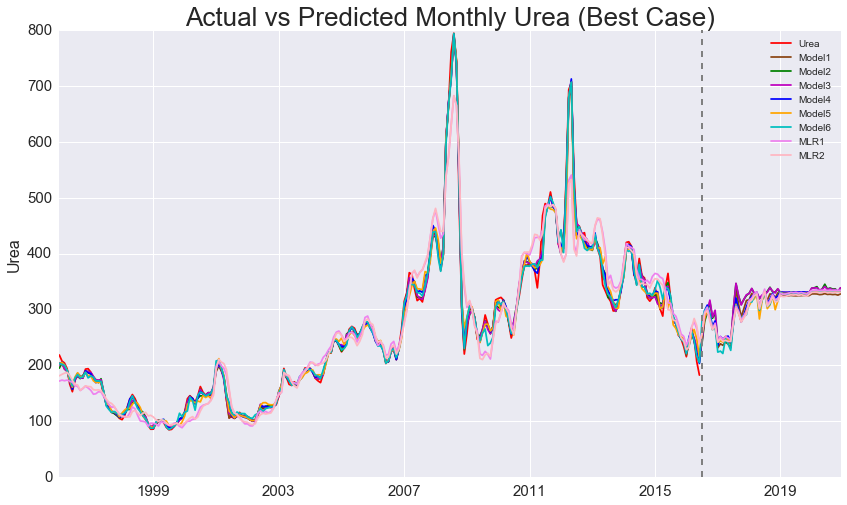

In [36]:
combined['Date'] = pd.to_datetime(combined['Date'])
date = combined['Date']
combined.index = combined['Date'].values
combined = combined.drop(['Date'],axis=1)
combined = combined.convert_objects(convert_numeric=True)
combined = combined.resample('MS',how='mean')
y1 = (combined['Urea'])
y2 = (combined['Model1'])
y3 = (combined['Model2'])
y4 = (combined['Model3'])
y5 = (combined['Model4'])
y6 = (combined['Model5'])
y7 = (combined['Model6'])
y8 = (combined['MLR1'])
y9 = (combined['MLR2'])
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
ax.plot(y1,'r')
ax.plot(y2,'saddlebrown')
ax.plot(y3,'g')
ax.plot(y4,'m')
ax.plot(y5,'b')
ax.plot(y6,'orange')
ax.plot(y7,'c')
ax.plot(y8,'violet')
ax.plot(y9,'lightpink')
plt.axvline(x='2016-07-01', ymin=0, linewidth=2, color='gray',linestyle = '--')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly Urea (Best Case)', size=(26))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea',size=(16))
plt.show()

## Worst Case Model 5
[Top](#table-of-contents)

In [37]:
#libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels import regression
import math
from matplotlib.ticker import MaxNLocator
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

In [38]:
data = pd.read_csv("C:/Users/msteinme/Documents/ureaUANjuneworst.csv")
df_96on = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2','Urea']][0:1069]
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.tail(2)
#1/5/1996 - 6/24/2016

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Urea
1067,2016-06-17,94.21,48.56,442.75,52.55,2.67,618651,1048312,169.92,185.0
1068,2016-06-24,95.45,48.31,389.00,52.90,2.69,618651,1048312,165.12,182.0


### MLR Models Worst Model 5
[Top](#table-of-contents)

In [39]:
# mlr1 top 3 of forward
featured_cols_top3 = ['Dollar','Urea_Inventory','UAN2']
X7 = df_96on[featured_cols_top3]
y7 = df_96on['Urea']
trainX7, testX7, trainY7, testY7 = train_test_split(X7,y7,test_size=0.3)
lm7 = LinearRegression()
lm7.fit(trainX7,trainY7)
zip(featured_cols_top3,lm7.coef_)

In [40]:
# mlr2 top 2 of forward
featured_cols_top2 = ['Dollar','UAN2']
X8 = df_96on[featured_cols_top2]
y8 = df_96on['Urea']
trainX8, testX8, trainY8, testY8 = train_test_split(X8,y8,test_size=0.3)
lm8 = LinearRegression()
lm8.fit(trainX8,trainY8)
zip(featured_cols_top2,lm8.coef_)

### RDF Models Worst Model 5
[Top](#table-of-contents)

In [41]:
#model 1
X1 = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2']].values
y1 = df_96on['Urea'].values
X_train1, X_test1, y_train1, y_test1= train_test_split(X1,y1,test_size=0.3,random_state=1)
forest1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1.fit(X_train1, y_train1)
y_train_pred1= forest1.predict(X_train1)
y_test_pred1= forest1.predict(X_test1)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1, y_train_pred1),mean_squared_error(y_test1, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1, y_train_pred1),r2_score(y_test1,y_test_pred1)))
print(forest1.feature_importances_)

MSE train: 52.645, test: 376.643
R^2 train: 0.997, test: 0.980
[ 0.00875789  0.03766028  0.02472922  0.0751072   0.01352537  0.00869393
  0.00431158  0.82721454]


In [42]:
#model 2
X2 = df_96on[['Crude','My_Coal','UAN2']].values
y2 = df_96on['Urea'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3,random_state=1)
forest2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2.fit(X_train2, y_train2)
y_train_pred2 = forest2.predict(X_train2)
y_test_pred2 = forest2.predict(X_test2)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2, y_train_pred2),mean_squared_error(y_test2, y_test_pred2)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2, y_train_pred2),r2_score(y_test2,y_test_pred2)))
print(forest2.feature_importances_)

MSE train: 108.457, test: 445.505
R^2 train: 0.994, test: 0.976
[ 0.056312   0.0964074  0.8472806]


In [43]:
#model 3
X3 = df_96on[['Crude','Corn','My_Coal','UAN2']].values
y3 = df_96on['Urea'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3,random_state=1)
forest3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3.fit(X_train3, y_train3)
y_train_pred3 = forest3.predict(X_train3)
y_test_pred3 = forest3.predict(X_test3)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3, y_train_pred3),mean_squared_error(y_test3, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3, y_train_pred3),r2_score(y_test3,y_test_pred3)))
print(forest3.feature_importances_)

MSE train: 93.647, test: 423.517
R^2 train: 0.995, test: 0.977
[ 0.04716515  0.03741049  0.08522858  0.83019578]


In [44]:
#model 4
X4 = df_96on[['Dollar','Urea_Inventory','UAN2']].values
y4 = df_96on['Urea'].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.3,random_state=1)
forest4 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4.fit(X_train4, y_train4)
y_train_pred4 = forest4.predict(X_train4)
y_test_pred4 = forest4.predict(X_test4)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4, y_train_pred4),mean_squared_error(y_test4, y_test_pred4)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4, y_train_pred4),r2_score(y_test4,y_test_pred4)))
print(forest4.feature_importances_)

MSE train: 113.978, test: 413.780
R^2 train: 0.994, test: 0.978
[ 0.03005929  0.02312026  0.94682044]


In [45]:
#model 5
X5 = df_96on[['Dollar','UAN2']].values
y5 = df_96on['Urea'].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.3,random_state=1)
forest5 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest5.fit(X_train5, y_train5)
y_train_pred5 = forest5.predict(X_train5)
y_test_pred5 = forest5.predict(X_test5)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train5, y_train_pred5),mean_squared_error(y_test5, y_test_pred5)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train5, y_train_pred5),r2_score(y_test5,y_test_pred5)))
print(forest5.feature_importances_)

MSE train: 289.292, test: 658.093
R^2 train: 0.984, test: 0.964
[ 0.04049713  0.95950287]


In [46]:
#model 6
X6 = df_96on[['Gas','Urea_Inventory','UAN2']].values
y6 = df_96on['Urea'].values
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6,y6,test_size=0.3,random_state=1)
forest6 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest6.fit(X_train6, y_train6)
y_train_pred6 = forest6.predict(X_train6)
y_test_pred6 = forest6.predict(X_test6)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train6, y_train_pred6),mean_squared_error(y_test6, y_test_pred6)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train6, y_train_pred6),r2_score(y_test6,y_test_pred6)))
print(forest6.feature_importances_)

MSE train: 99.123, test: 543.370
R^2 train: 0.995, test: 0.971
[ 0.02705459  0.02631472  0.94663068]


In [47]:
# comparing models that will be used
model1 = forest1.predict(X1)
model2 = forest2.predict(X2)
model3 = forest3.predict(X3)
model4 = forest4.predict(X4)
model5 = forest5.predict(X5)
model6 = forest6.predict(X6)
mlr1 = lm7.predict(X7)
mlr2 = lm8.predict(X8)
model1 = pd.DataFrame(model1)
model2 = pd.DataFrame(model2)
model3 = pd.DataFrame(model3)
model4 = pd.DataFrame(model4)
model5 = pd.DataFrame(model5)
model6 = pd.DataFrame(model6)
mlr1 = pd.DataFrame(mlr1)
mlr2 = pd.DataFrame(mlr2)
df_96on['MLR1'] = mlr1
df_96on['MLR2'] = mlr2
df_96on['Model1'] = model1
df_96on['Model2'] = model2
df_96on['Model3'] = model3
df_96on['Model4'] = model4
df_96on['Model5'] = model5
df_96on['Model6'] = model6
df_96on.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Urea,MLR1,MLR2,Model1,Model2,Model3,Model4,Model5,Model6
0,1996-01-05,85.06,19.65,369.75,25.36,2.42,589899,1271053,114.00,220.0,167.966096,183.432320,208.410220,198.542179,202.966497,217.24000,215.961463,206.311911
1,1996-01-12,85.06,17.98,366.25,25.27,2.22,589899,1271053,114.96,220.0,169.134188,184.590246,211.615000,199.771774,206.313889,216.76000,216.812530,205.155145
2,1996-01-19,86.75,18.25,365.00,29.07,1.96,589899,1271053,114.96,218.0,167.422192,182.160603,203.310012,189.785869,196.653654,202.67677,201.363664,202.718479


### Predictions Part Worst Model 5
[Top](#table-of-contents)

In [48]:
#predictions section 7/1/2016 - 12/25/2020
newpred = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2']][1069:1304]
newpred1 = data [['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2']][1069:1304] #goes with model 1 and mlr1
newpred2 = data[['Crude','My_Coal','UAN2']][1069:1304] #goes with model 2
newpred3 = data[['Crude','Corn','My_Coal','UAN2']][1069:1304] #goes with model 3
newpred4 = data[['Dollar','Urea_Inventory','UAN2']][1069:1304] #goes with model 4
newpred5 = data[['Dollar','UAN2']][1069:1304]  #goes with model 5
newpred6 = data [['Gas','Urea_Inventory','UAN2']][1069:1304] #goes with model6
newpred7 = data[['Dollar','Urea_Inventory','UAN2']][1069:1304]#goes with mlr1
newpred8 = data[['Dollar','UAN2']][1069:1304]#goes with mlr2
newpred.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2
1069,7/1/2016,95.65,49.65,360.00,58.15,2.98,659025,1186900,142.080000
1070,7/8/2016,96.30,46.12,355.00,59.25,2.79,659025,1186900,142.080000
1071,7/15/2016,98.65,45.51,376.97,52.74,2.50,659025,1186900,183.193898


In [49]:
newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2'] #all variables used except urea
newpred['Date'] = pd.to_datetime(newpred['Date'])
print(newpred.dtypes)
newpred

Date              datetime64[ns]
Dollar                    object
Crude                     object
Corn                      object
My_Coal                   object
Gas                       object
Urea_Inventory            object
UAN_Inventory             object
UAN2                      object
dtype: object


,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2
0,2016-07-01,95.65,49.65,360,58.15,2.98,659025,1186900,142.08
1,2016-07-08,96.3,46.12,355,59.25,2.79,659025,1186900,142.08
2,2016-07-15,98.65,45.51,376.97,52.74,2.5,659025,1186900,183.194
3,2016-07-22,96.01,46.24,345.11,52.65,2.31,659025,1186900,182.868
4,2016-07-29,97.95,46.63,355.82,52.85,2.67,659025,1186900,182.173
5,2016-08-05,99.41,43.36,370.12,51.94,2.38,635811,1250760,182.075
6,2016-08-12,96.62,41.82,362.94,52.59,2.47,635811,1250760,182.609
7,2016-08-19,98.64,40.33,362.27,52.81,2.31,635811,1250760,182.413
8,2016-08-26,98.32,46.34,362.38,52.68,2.69,635811,1250760,181.101
9,2016-09-02,98.1,46.91,380.22,51.93,2.6,462435,1258240,183.215


In [50]:
#model 1, 2, 3, 4, 5, 6 and mLR models
newpred_predicted1 = forest1.predict(newpred1)
df_new_pred1 = pd.DataFrame(newpred_predicted1)
newpred['Model1'] = df_new_pred1
newpred_predicted2 = forest2.predict(newpred2)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred['Model2'] = df_new_pred2
newpred_predicted3 = forest3.predict(newpred3)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Model3'] = df_new_pred3
newpred_predicted4 = forest4.predict(newpred4)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred['Model4'] = df_new_pred4
newpred_predicted5 = forest5.predict(newpred5)
df_new_pred5 = pd.DataFrame(newpred_predicted5)
newpred['Model5'] = df_new_pred5
newpred_predicted6 = forest6.predict(newpred6)
df_new_pred6 = pd.DataFrame(newpred_predicted6)
newpred['Model6'] = df_new_pred6
newpred_predicted7 = lm7.predict(newpred7)
df_new_pred7 = pd.DataFrame(newpred_predicted7)
newpred['MLR1'] = df_new_pred7
newpred_predicted8 = lm8.predict(newpred8)
df_new_pred8 = pd.DataFrame(newpred_predicted8)
newpred['MLR2'] = df_new_pred8
newpred.head(2)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
0,2016-07-01,95.65,49.65,360,58.15,2.98,659025,1186900,142.08,209.892749,206.798956,204.753824,188.023968,199.530968,158.429000,187.421306,202.076830
1,2016-07-08,96.3,46.12,355,59.25,2.79,659025,1186900,142.08,203.901756,209.039790,201.688458,188.456635,199.562651,159.645666,186.762846,201.142352


In [51]:
frames = [df_96on,newpred]
combined = pd.concat(frames)
combined.tail(2)

,Corn,Crude,Date,Dollar,Gas,MLR1,MLR2,Model1,Model2,Model3,Model4,Model5,Model6,My_Coal,UAN2,UAN_Inventory,Urea,Urea_Inventory
233,400.2,49.9,2020-12-18,99.25,2.92,240.825317,244.370914,214.183394,237.009772,245.073185,219.560540,249.505244,229.359700,50.91,181.436,1200000,NaN,500000
234,403,53.9,2020-12-25,95.6,2.99,234.856491,240.036169,217.102967,258.915416,266.714479,221.448821,231.988837,224.991012,51.3,173.491,1200000,NaN,500000


In [52]:
combined = combined[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2','Urea','Model1','Model2','Model3','Model4','Model5','Model6','MLR1','MLR2']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2','Urea','Model1','Model2','Model3','Model4','Model5','Model6','MLR1','MLR2']
combined

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Urea,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
0,1996-01-05 00:00:00,85.06,19.65,369.75,25.36,2.42,589899,1271053,114,220,208.41,198.542,202.966,217.24,215.961,206.312,167.966,183.432
1,1996-01-12 00:00:00,85.06,17.98,366.25,25.27,2.22,589899,1271053,114.96,220,211.615,199.772,206.314,216.76,216.813,205.155,169.134,184.59
2,1996-01-19 00:00:00,86.75,18.25,365,29.07,1.96,589899,1271053,114.96,218,203.31,189.786,196.654,202.677,201.364,202.718,167.422,182.161
3,1996-01-26 00:00:00,87.64,17.36,360.25,29.2,1.95,589899,1271053,115.6,215,188.214,185.66,196.14,176.417,175.206,195.441,167.299,181.653
4,1996-02-02 00:00:00,87.01,17.38,370.5,32.11,2.08,609091,1360395,117.2,205,203.89,198.617,203.329,203.033,201.005,202.342,168.778,184.489
5,1996-02-09 00:00:00,86.87,17.38,367.25,28.67,2.24,609091,1360395,117.2,205,206.957,204.208,205.718,203.299,202.259,202.675,168.92,184.69
6,1996-02-16 00:00:00,85.91,18.4,382.75,28.17,2.17,609091,1360395,117.2,210,204.982,203.246,202.321,203.753,203.276,201.935,169.893,186.07
7,1996-02-23 00:00:00,85.43,18.45,383.5,28.83,2.26,609091,1360395,117.2,210,207.737,203.706,203.677,210.007,210.096,203.595,170.379,186.76
8,1996-03-01 00:00:00,86.49,18.62,386.75,27.86,2.06,681818,1523421,117.2,210,203.164,202.084,199.869,202.71,201.785,202.43,165.114,185.236
9,1996-03-08 00:00:00,86.81,18.87,388.5,26.51,2.05,681818,1523421,117.2,205,200.352,193.019,191.355,203.941,202.679,202.305,164.79,184.776


In [53]:
combined.to_csv("C:/Users/msteinme/Documents/Ureajuneworstresults2.csv")

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


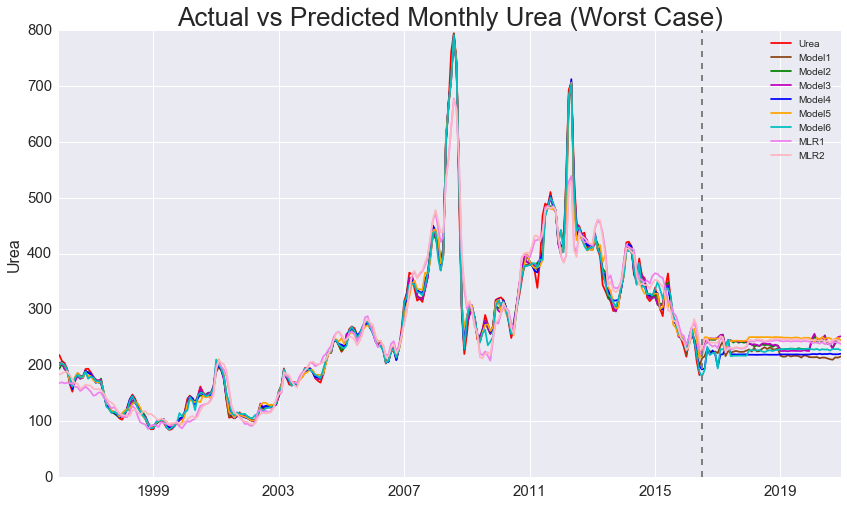

In [54]:
combined['Date'] = pd.to_datetime(combined['Date'])
date = combined['Date']
combined.index = combined['Date'].values
combined = combined.drop(['Date'],axis=1)
combined = combined.convert_objects(convert_numeric=True)
combined = combined.resample('MS',how='mean')
y1 = (combined['Urea'])
y2 = (combined['Model1'])
y3 = (combined['Model2'])
y4 = (combined['Model3'])
y5 = (combined['Model4'])
y6 = (combined['Model5'])
y7 = (combined['Model6'])
y8 = (combined['MLR1'])
y9 = (combined['MLR2'])
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
ax.plot(y1,'r')
ax.plot(y2,'saddlebrown')
ax.plot(y3,'g')
ax.plot(y4,'m')
ax.plot(y5,'b')
ax.plot(y6,'orange')
ax.plot(y7,'c')
ax.plot(y8,'violet')
ax.plot(y9,'lightpink')
plt.axvline(x='2016-07-01', ymin=0, linewidth=2, color='gray',linestyle = '--')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly Urea (Worst Case)', size=(26))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea',size=(16))
plt.show()

# Using MLR2
## Average Case MLR2
[Top](#table-of-contents)

In [55]:
#libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels import regression
import math
from matplotlib.ticker import MaxNLocator
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

In [56]:
data = pd.read_csv("C:/Users/msteinme/Documents/ureaUANjuneavg.csv")
df_96on = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN3','Urea']][0:1069]
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.tail(2)
#1/5/1996 - 6/24/2016

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN3,Urea
1067,2016-06-17,94.21,48.56,442.75,52.55,2.67,494921,1048312,169.92,185.0
1068,2016-06-24,95.45,48.31,389.00,52.90,2.69,494921,1048312,165.12,182.0


### MLR Models Avg MLR2
[Top](#table-of-contents)

In [58]:
# mlr1 top 3 of forward
featured_cols_top3 = ['Dollar','Urea_Inventory','UAN3']
X7 = df_96on[featured_cols_top3]
y7 = df_96on['Urea']
trainX7, testX7, trainY7, testY7 = train_test_split(X7,y7,test_size=0.3)
lm7 = LinearRegression()
lm7.fit(trainX7,trainY7)
zip(featured_cols_top3,lm7.coef_)

In [59]:
# mlr2 top 2 of forward
featured_cols_top2 = ['Dollar','UAN3']
X8 = df_96on[featured_cols_top2]
y8 = df_96on['Urea']
trainX8, testX8, trainY8, testY8 = train_test_split(X8,y8,test_size=0.3)
lm8 = LinearRegression()
lm8.fit(trainX8,trainY8)
zip(featured_cols_top2,lm8.coef_)

### RDF Models MLR2
[Top](#table-of-contents)

In [60]:
#model 1
X1 = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN3']].values
y1 = df_96on['Urea'].values
X_train1, X_test1, y_train1, y_test1= train_test_split(X1,y1,test_size=0.3,random_state=1)
forest1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1.fit(X_train1, y_train1)
y_train_pred1= forest1.predict(X_train1)
y_test_pred1= forest1.predict(X_test1)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1, y_train_pred1),mean_squared_error(y_test1, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1, y_train_pred1),r2_score(y_test1,y_test_pred1)))
print(forest1.feature_importances_)

MSE train: 52.523, test: 370.915
R^2 train: 0.997, test: 0.980
[ 0.00858962  0.0409434   0.02647731  0.07180583  0.01410769  0.00845689
  0.0044399   0.82517936]


In [61]:
#model 2
X2 = df_96on[['Crude','My_Coal','UAN3']].values
y2 = df_96on['Urea'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3,random_state=1)
forest2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2.fit(X_train2, y_train2)
y_train_pred2 = forest2.predict(X_train2)
y_test_pred2 = forest2.predict(X_test2)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2, y_train_pred2),mean_squared_error(y_test2, y_test_pred2)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2, y_train_pred2),r2_score(y_test2,y_test_pred2)))
print(forest2.feature_importances_)

MSE train: 103.800, test: 453.813
R^2 train: 0.994, test: 0.975
[ 0.05698905  0.09868946  0.84432148]


In [62]:
#model 3
X3 = df_96on[['Crude','Corn','My_Coal','UAN3']].values
y3 = df_96on['Urea'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3,random_state=1)
forest3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3.fit(X_train3, y_train3)
y_train_pred3 = forest3.predict(X_train3)
y_test_pred3 = forest3.predict(X_test3)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3, y_train_pred3),mean_squared_error(y_test3, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3, y_train_pred3),r2_score(y_test3,y_test_pred3)))
print(forest3.feature_importances_)

MSE train: 91.637, test: 412.864
R^2 train: 0.995, test: 0.978
[ 0.05229188  0.03506137  0.0817947   0.83085205]


In [63]:
#model 4
X4 = df_96on[['Dollar','Urea_Inventory','UAN3']].values
y4 = df_96on['Urea'].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.3,random_state=1)
forest4 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4.fit(X_train4, y_train4)
y_train_pred4 = forest4.predict(X_train4)
y_test_pred4 = forest4.predict(X_test4)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4, y_train_pred4),mean_squared_error(y_test4, y_test_pred4)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4, y_train_pred4),r2_score(y_test4,y_test_pred4)))
print(forest4.feature_importances_)

MSE train: 111.784, test: 428.983
R^2 train: 0.994, test: 0.977
[ 0.03029927  0.02356285  0.94613788]


In [64]:
#model 5
X5 = df_96on[['Dollar','UAN3']].values
y5 = df_96on['Urea'].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.3,random_state=1)
forest5 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest5.fit(X_train5, y_train5)
y_train_pred5 = forest5.predict(X_train5)
y_test_pred5 = forest5.predict(X_test5)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train5, y_train_pred5),mean_squared_error(y_test5, y_test_pred5)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train5, y_train_pred5),r2_score(y_test5,y_test_pred5)))
print(forest5.feature_importances_)

MSE train: 282.243, test: 647.776
R^2 train: 0.985, test: 0.965
[ 0.04035295  0.95964705]


In [65]:
#model 6
X6 = df_96on[['Gas','Urea_Inventory','UAN3']].values
y6 = df_96on['Urea'].values
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6,y6,test_size=0.3,random_state=1)
forest6 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest6.fit(X_train6, y_train6)
y_train_pred6 = forest6.predict(X_train6)
y_test_pred6 = forest6.predict(X_test6)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train6, y_train_pred6),mean_squared_error(y_test6, y_test_pred6)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train6, y_train_pred6),r2_score(y_test6,y_test_pred6)))
print(forest6.feature_importances_)

MSE train: 96.767, test: 563.898
R^2 train: 0.995, test: 0.969
[ 0.02637927  0.02559268  0.94802806]


In [66]:
# comparing models that will be used
model1 = forest1.predict(X1)
model2 = forest2.predict(X2)
model3 = forest3.predict(X3)
model4 = forest4.predict(X4)
model5 = forest5.predict(X5)
model6 = forest6.predict(X6)
mlr1 = lm7.predict(X7)
mlr2 = lm8.predict(X8)
model1 = pd.DataFrame(model1)
model2 = pd.DataFrame(model2)
model3 = pd.DataFrame(model3)
model4 = pd.DataFrame(model4)
model5 = pd.DataFrame(model5)
model6 = pd.DataFrame(model6)
mlr1 = pd.DataFrame(mlr1)
mlr2 = pd.DataFrame(mlr2)
df_96on['MLR1'] = mlr1
df_96on['MLR2'] = mlr2
df_96on['Model1'] = model1
df_96on['Model2'] = model2
df_96on['Model3'] = model3
df_96on['Model4'] = model4
df_96on['Model5'] = model5
df_96on['Model6'] = model6
df_96on.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN3,Urea,MLR1,MLR2,Model1,Model2,Model3,Model4,Model5,Model6
0,1996-01-05,85.06,19.65,369.75,25.36,2.42,589899,1271053,114.00,220.0,171.314941,181.694004,211.229208,201.821866,201.763055,216.680000,215.869424,206.779372
1,1996-01-12,85.06,17.98,366.25,25.27,2.22,589899,1271053,114.96,220.0,172.457805,182.886680,211.098961,198.926780,208.715841,217.133333,216.981567,204.558374
2,1996-01-19,86.75,18.25,365.00,29.07,1.96,589899,1271053,114.96,218.0,170.438664,180.564099,202.091854,184.617996,199.129908,201.990000,202.435557,202.553499


### Predictions Part MLR2
[Top](#table-of-contents)

In [67]:
#predictions section 7/1/2016 - 12/25/2020
newpred = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN3']][1069:1304]
newpred1 = data [['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN3']][1069:1304] #goes with model 1 and mlr1
newpred2 = data[['Crude','My_Coal','UAN3']][1069:1304] #goes with model 2
newpred3 = data[['Crude','Corn','My_Coal','UAN3']][1069:1304] #goes with model 3
newpred4 = data[['Dollar','Urea_Inventory','UAN3']][1069:1304] #goes with model 4
newpred5 = data[['Dollar','UAN3']][1069:1304]  #goes with model 5
newpred6 = data [['Gas','Urea_Inventory','UAN3']][1069:1304] #goes with model6
newpred7 = data[['Dollar','Urea_Inventory','UAN3']][1069:1304]#goes with mlr1
newpred8 = data[['Dollar','UAN3']][1069:1304]#goes with mlr2
newpred.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN3
1069,7/1/2016,95.65,49.65,360.00,58.15,2.98,527220,1186900,142.080000
1070,7/8/2016,96.30,46.12,355.00,59.25,2.79,527220,1186900,142.080000
1071,7/15/2016,96.13,48.28,382.31,53.12,2.66,527220,1186900,169.836618


In [68]:
newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN3'] #all variables used except urea
newpred['Date'] = pd.to_datetime(newpred['Date'])
print(newpred.dtypes)
newpred

Date              datetime64[ns]
Dollar                    object
Crude                     object
Corn                      object
My_Coal                   object
Gas                       object
Urea_Inventory            object
UAN_Inventory             object
UAN3                      object
dtype: object


,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN3
0,2016-07-01,95.65,49.65,360,58.15,2.98,527220,1186900,142.08
1,2016-07-08,96.3,46.12,355,59.25,2.79,527220,1186900,142.08
2,2016-07-15,96.13,48.28,382.31,53.12,2.66,527220,1186900,169.837
3,2016-07-22,95.6,46.81,380.9,53.07,2.51,527220,1186900,166.852
4,2016-07-29,95.77,47.54,381.38,53.08,2.64,527220,1186900,168.517
5,2016-08-05,96.63,46.59,387.16,52.96,2.56,508649,1250760,168.955
6,2016-08-12,96.9,47.22,385.1,53.04,2.59,508649,1250760,169.587
7,2016-08-19,96.04,48.11,381.27,53.02,2.55,508649,1250760,168.646
8,2016-08-26,95.77,47.51,379.14,53.1,2.55,508649,1250760,167.53
9,2016-09-02,96.61,47.38,382.68,53.03,2.62,369948,1258240,169.159


In [69]:
#model 1, 2, 3, 4, 5, 6 and mLR models
newpred_predicted1 = forest1.predict(newpred1)
df_new_pred1 = pd.DataFrame(newpred_predicted1)
newpred['Model1'] = df_new_pred1
newpred_predicted2 = forest2.predict(newpred2)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred['Model2'] = df_new_pred2
newpred_predicted3 = forest3.predict(newpred3)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Model3'] = df_new_pred3
newpred_predicted4 = forest4.predict(newpred4)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred['Model4'] = df_new_pred4
newpred_predicted5 = forest5.predict(newpred5)
df_new_pred5 = pd.DataFrame(newpred_predicted5)
newpred['Model5'] = df_new_pred5
newpred_predicted6 = forest6.predict(newpred6)
df_new_pred6 = pd.DataFrame(newpred_predicted6)
newpred['Model6'] = df_new_pred6
newpred_predicted7 = lm7.predict(newpred7)
df_new_pred7 = pd.DataFrame(newpred_predicted7)
newpred['MLR1'] = df_new_pred7
newpred_predicted8 = lm8.predict(newpred8)
df_new_pred8 = pd.DataFrame(newpred_predicted8)
newpred['MLR2'] = df_new_pred8
newpred.head(2)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN3,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
0,2016-07-01,95.65,49.65,360,58.15,2.98,527220,1186900,142.08,209.075503,207.89731,209.223824,192.925406,202.108155,202.978403,195.833459,202.025856
1,2016-07-08,96.3,46.12,355,59.25,2.79,527220,1186900,142.08,205.224563,209.10129,201.967520,193.019480,202.274822,204.508403,195.056867,201.132556


In [70]:
frames = [df_96on,newpred]
combined = pd.concat(frames)
combined.tail(2)

,Corn,Crude,Date,Dollar,Gas,MLR1,MLR2,Model1,Model2,Model3,Model4,Model5,Model6,My_Coal,UAN3,UAN_Inventory,Urea,Urea_Inventory
233,421.59,62.99,2020-12-18,90.81,3.29,274.830594,277.156399,273.005969,298.818754,299.387508,265.925668,266.691740,285.520455,59.1,197.2,1000000,NaN,400000
234,465.75,67.68,2020-12-25,90.8,3.45,291.890562,294.961200,305.423187,341.865384,328.850567,304.365431,269.670299,301.981017,59.15,211.52,1000000,NaN,400000


In [71]:
combined = combined[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN3','Urea','Model1','Model2','Model3','Model4','Model5','Model6','MLR1','MLR2']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN3','Urea','Model1','Model2','Model3','Model4','Model5','Model6','MLR1','MLR2']
combined

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN3,Urea,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
0,1996-01-05 00:00:00,85.06,19.65,369.75,25.36,2.42,589899,1271053,114,220,211.229,201.822,201.763,216.68,215.869,206.779,171.315,181.694
1,1996-01-12 00:00:00,85.06,17.98,366.25,25.27,2.22,589899,1271053,114.96,220,211.099,198.927,208.716,217.133,216.982,204.558,172.458,182.887
2,1996-01-19 00:00:00,86.75,18.25,365,29.07,1.96,589899,1271053,114.96,218,202.092,184.618,199.13,201.99,202.436,202.553,170.439,180.564
3,1996-01-26 00:00:00,87.64,17.36,360.25,29.2,1.95,589899,1271053,115.6,215,187.591,182.305,197.143,172.876,177.255,195.618,170.137,180.136
4,1996-02-02 00:00:00,87.01,17.38,370.5,32.11,2.08,609091,1360395,117.2,205,202.837,200.371,203.659,201.673,202.146,203.392,171.649,182.99
5,1996-02-09 00:00:00,86.87,17.38,367.25,28.67,2.24,609091,1360395,117.2,205,204.826,203.948,205.547,202.106,202.628,203.867,171.816,183.182
6,1996-02-16 00:00:00,85.91,18.4,382.75,28.17,2.17,609091,1360395,117.2,210,203.267,203.289,202.482,202.563,203.259,203.304,172.963,184.501
7,1996-02-23 00:00:00,85.43,18.45,383.5,28.83,2.26,609091,1360395,117.2,210,206.502,204.602,204.463,209.708,209.513,204.287,173.537,185.161
8,1996-03-01 00:00:00,86.49,18.62,386.75,27.86,2.06,681818,1523421,117.2,210,201.029,201.739,200.957,201.979,201.232,202.642,167.928,183.704
9,1996-03-08 00:00:00,86.81,18.87,388.5,26.51,2.05,681818,1523421,117.2,205,198.99,194.47,193.732,203.046,202.69,202.522,167.546,183.265


In [72]:
combined.to_csv("C:/Users/msteinme/Documents/Ureajuneavgresults3.csv")

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


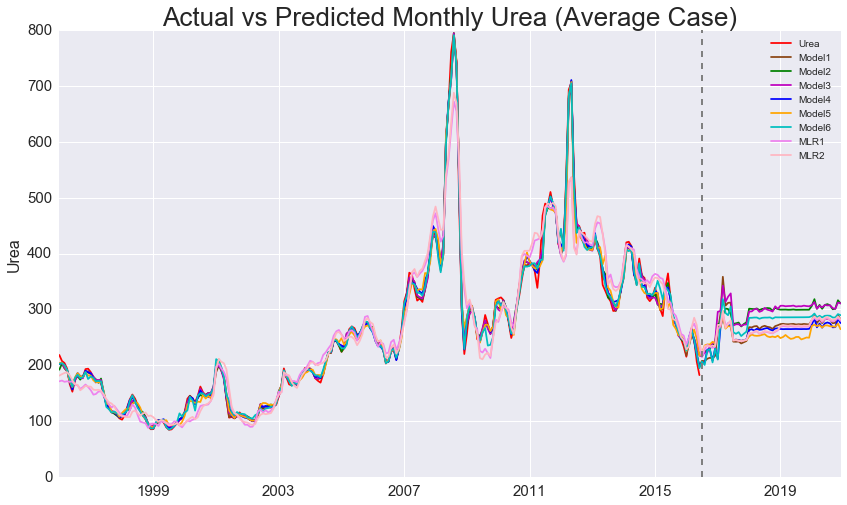

In [73]:
combined['Date'] = pd.to_datetime(combined['Date'])
date = combined['Date']
combined.index = combined['Date'].values
combined = combined.drop(['Date'],axis=1)
combined = combined.convert_objects(convert_numeric=True)
combined = combined.resample('MS',how='mean')
y1 = (combined['Urea'])
y2 = (combined['Model1'])
y3 = (combined['Model2'])
y4 = (combined['Model3'])
y5 = (combined['Model4'])
y6 = (combined['Model5'])
y7 = (combined['Model6'])
y8 = (combined['MLR1'])
y9 = (combined['MLR2'])
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
ax.plot(y1,'r')
ax.plot(y2,'saddlebrown')
ax.plot(y3,'g')
ax.plot(y4,'m')
ax.plot(y5,'b')
ax.plot(y6,'orange')
ax.plot(y7,'c')
ax.plot(y8,'violet')
ax.plot(y9,'lightpink')
plt.axvline(x='2016-07-01', ymin=0, linewidth=2, color='gray',linestyle = '--')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly Urea (Average Case)', size=(26))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea',size=(16))
plt.show()

## Best Case MLR2
[Top](#table-of-contents)

In [74]:
#libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels import regression
import math
from matplotlib.ticker import MaxNLocator
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

In [75]:
data = pd.read_csv("C:/Users/msteinme/Documents/ureaUANjunebest.csv")
df_96on = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN3','Urea']][0:1069]
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.tail(2)
#1/5/1996 - 6/24/2016

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN3,Urea
1067,2016-06-17,94.21,48.56,442.75,52.55,2.67,371191,1048312,169.92,185.0
1068,2016-06-24,95.45,48.31,389.00,52.90,2.69,371191,1048312,165.12,182.0


### MLR Models Best MLR2
[Top](#table-of-contents)

In [76]:
# mlr1 top 3 of forward
featured_cols_top3 = ['Dollar','Urea_Inventory','UAN3']
X7 = df_96on[featured_cols_top3]
y7 = df_96on['Urea']
trainX7, testX7, trainY7, testY7 = train_test_split(X7,y7,test_size=0.3)
lm7 = LinearRegression()
lm7.fit(trainX7,trainY7)
zip(featured_cols_top3,lm7.coef_)

In [77]:
# mlr2 top 2 of forward
featured_cols_top2 = ['Dollar','UAN3']
X8 = df_96on[featured_cols_top2]
y8 = df_96on['Urea']
trainX8, testX8, trainY8, testY8 = train_test_split(X8,y8,test_size=0.3)
lm8 = LinearRegression()
lm8.fit(trainX8,trainY8)
zip(featured_cols_top2,lm8.coef_)

### RDF Models Best MLR2
[Top](#table-of-contents)

In [78]:
#model 1
X1 = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN3']].values
y1 = df_96on['Urea'].values
X_train1, X_test1, y_train1, y_test1= train_test_split(X1,y1,test_size=0.3,random_state=1)
forest1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1.fit(X_train1, y_train1)
y_train_pred1= forest1.predict(X_train1)
y_test_pred1= forest1.predict(X_test1)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1, y_train_pred1),mean_squared_error(y_test1, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1, y_train_pred1),r2_score(y_test1,y_test_pred1)))
print(forest1.feature_importances_)

MSE train: 54.125, test: 376.699
R^2 train: 0.997, test: 0.980
[ 0.0095079   0.03821816  0.02723627  0.07065357  0.0141553   0.00837353
  0.00472472  0.82713056]


In [79]:
#model 2
X2 = df_96on[['Crude','My_Coal','UAN3']].values
y2 = df_96on['Urea'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3,random_state=1)
forest2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2.fit(X_train2, y_train2)
y_train_pred2 = forest2.predict(X_train2)
y_test_pred2 = forest2.predict(X_test2)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2, y_train_pred2),mean_squared_error(y_test2, y_test_pred2)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2, y_train_pred2),r2_score(y_test2,y_test_pred2)))
print(forest2.feature_importances_)

MSE train: 109.854, test: 425.206
R^2 train: 0.994, test: 0.977
[ 0.05628384  0.09947423  0.84424193]


In [80]:
#model 3
X3 = df_96on[['Crude','Corn','My_Coal','UAN3']].values
y3 = df_96on['Urea'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3,random_state=1)
forest3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3.fit(X_train3, y_train3)
y_train_pred3 = forest3.predict(X_train3)
y_test_pred3 = forest3.predict(X_test3)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3, y_train_pred3),mean_squared_error(y_test3, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3, y_train_pred3),r2_score(y_test3,y_test_pred3)))
print(forest3.feature_importances_)

MSE train: 86.247, test: 426.125
R^2 train: 0.995, test: 0.977
[ 0.05094471  0.03289458  0.08495472  0.83120599]


In [81]:
#model 4
X4 = df_96on[['Dollar','Urea_Inventory','UAN3']].values
y4 = df_96on['Urea'].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.3,random_state=1)
forest4 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4.fit(X_train4, y_train4)
y_train_pred4 = forest4.predict(X_train4)
y_test_pred4 = forest4.predict(X_test4)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4, y_train_pred4),mean_squared_error(y_test4, y_test_pred4)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4, y_train_pred4),r2_score(y_test4,y_test_pred4)))
print(forest4.feature_importances_)

MSE train: 115.713, test: 409.154
R^2 train: 0.994, test: 0.978
[ 0.03081208  0.02305134  0.94613658]


In [82]:
#model 5
X5 = df_96on[['Dollar','UAN3']].values
y5 = df_96on['Urea'].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.3,random_state=1)
forest5 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest5.fit(X_train5, y_train5)
y_train_pred5 = forest5.predict(X_train5)
y_test_pred5 = forest5.predict(X_test5)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train5, y_train_pred5),mean_squared_error(y_test5, y_test_pred5)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train5, y_train_pred5),r2_score(y_test5,y_test_pred5)))
print(forest5.feature_importances_)

MSE train: 294.376, test: 633.613
R^2 train: 0.984, test: 0.966
[ 0.04023568  0.95976432]


In [83]:
#model 6
X6 = df_96on[['Gas','Urea_Inventory','UAN3']].values
y6 = df_96on['Urea'].values
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6,y6,test_size=0.3,random_state=1)
forest6 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest6.fit(X_train6, y_train6)
y_train_pred6 = forest6.predict(X_train6)
y_test_pred6 = forest6.predict(X_test6)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train6, y_train_pred6),mean_squared_error(y_test6, y_test_pred6)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train6, y_train_pred6),r2_score(y_test6,y_test_pred6)))
print(forest6.feature_importances_)

MSE train: 101.471, test: 564.003
R^2 train: 0.994, test: 0.969
[ 0.02686046  0.02577926  0.94736027]


In [84]:
# comparing models that will be used
model1 = forest1.predict(X1)
model2 = forest2.predict(X2)
model3 = forest3.predict(X3)
model4 = forest4.predict(X4)
model5 = forest5.predict(X5)
model6 = forest6.predict(X6)
mlr1 = lm7.predict(X7)
mlr2 = lm8.predict(X8)
model1 = pd.DataFrame(model1)
model2 = pd.DataFrame(model2)
model3 = pd.DataFrame(model3)
model4 = pd.DataFrame(model4)
model5 = pd.DataFrame(model5)
model6 = pd.DataFrame(model6)
mlr1 = pd.DataFrame(mlr1)
mlr2 = pd.DataFrame(mlr2)
df_96on['MLR1'] = mlr1
df_96on['MLR2'] = mlr2
df_96on['Model1'] = model1
df_96on['Model2'] = model2
df_96on['Model3'] = model3
df_96on['Model4'] = model4
df_96on['Model5'] = model5
df_96on['Model6'] = model6
df_96on.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN3,Urea,MLR1,MLR2,Model1,Model2,Model3,Model4,Model5,Model6
0,1996-01-05,85.06,19.65,369.75,25.36,2.42,589899,1271053,114.00,220.0,171.352971,182.432775,207.915149,202.420615,201.913184,215.766667,216.735944,208.524612
1,1996-01-12,85.06,17.98,366.25,25.27,2.22,589899,1271053,114.96,220.0,172.495947,183.588364,210.453292,203.660917,206.394119,216.126667,216.255944,207.860668
2,1996-01-19,86.75,18.25,365.00,29.07,1.96,589899,1271053,114.96,218.0,170.494066,181.128365,199.037353,188.669246,199.570949,201.615848,200.192015,204.986918


### Predictions Part Best MLR2
[Top](#table-of-contents)

In [85]:
#predictions section 7/1/2016 - 12/25/2020
newpred = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN3']][1069:1304]
newpred1 = data [['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN3']][1069:1304] #goes with model 1 and mlr1
newpred2 = data[['Crude','My_Coal','UAN3']][1069:1304] #goes with model 2
newpred3 = data[['Crude','Corn','My_Coal','UAN3']][1069:1304] #goes with model 3
newpred4 = data[['Dollar','Urea_Inventory','UAN3']][1069:1304] #goes with model 4
newpred5 = data[['Dollar','UAN3']][1069:1304]  #goes with model 5
newpred6 = data [['Gas','Urea_Inventory','UAN3']][1069:1304] #goes with model6
newpred7 = data[['Dollar','Urea_Inventory','UAN3']][1069:1304]#goes with mlr1
newpred8 = data[['Dollar','UAN3']][1069:1304]#goes with mlr2
newpred.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN3
1069,7/1/2016,95.65,49.65,360.00,58.15,2.98,395415,1186900,142.080000
1070,7/8/2016,96.30,46.12,355.00,59.25,2.79,395415,1186900,142.080000
1071,7/15/2016,94.06,48.48,402.54,53.79,2.76,395415,1186900,172.326098


In [86]:
newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN3'] #all variables used except urea
newpred['Date'] = pd.to_datetime(newpred['Date'])
print(newpred.dtypes)
newpred

Date              datetime64[ns]
Dollar                    object
Crude                     object
Corn                      object
My_Coal                   object
Gas                       object
Urea_Inventory            object
UAN_Inventory             object
UAN3                      object
dtype: object


,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN3
0,2016-07-01,95.65,49.65,360,58.15,2.98,395415,1186900,142.08
1,2016-07-08,96.3,46.12,355,59.25,2.79,395415,1186900,142.08
2,2016-07-15,94.06,48.48,402.54,53.79,2.76,395415,1186900,172.326
3,2016-07-22,92.51,48.64,396.62,54.73,2.72,395415,1186900,170.78
4,2016-07-29,93.53,49.1,389.17,54.06,2.81,395415,1186900,170.189
5,2016-08-05,93.57,48.8,405.67,55.42,2.87,381487,1250760,175.351
6,2016-08-12,93.25,48.78,398.79,55.27,2.71,381487,1250760,172.401
7,2016-08-19,93.99,49.36,409.9,55.43,2.89,381487,1250760,177.195
8,2016-08-26,94.8,48.94,405.38,53.21,2.77,381487,1250760,173.332
9,2016-09-02,94.05,50.85,409.87,54.67,2.79,277461,1258240,177.062


In [87]:
#model 1, 2, 3, 4, 5, 6 and mLR models
newpred_predicted1 = forest1.predict(newpred1)
df_new_pred1 = pd.DataFrame(newpred_predicted1)
newpred['Model1'] = df_new_pred1
newpred_predicted2 = forest2.predict(newpred2)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred['Model2'] = df_new_pred2
newpred_predicted3 = forest3.predict(newpred3)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Model3'] = df_new_pred3
newpred_predicted4 = forest4.predict(newpred4)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred['Model4'] = df_new_pred4
newpred_predicted5 = forest5.predict(newpred5)
df_new_pred5 = pd.DataFrame(newpred_predicted5)
newpred['Model5'] = df_new_pred5
newpred_predicted6 = forest6.predict(newpred6)
df_new_pred6 = pd.DataFrame(newpred_predicted6)
newpred['Model6'] = df_new_pred6
newpred_predicted7 = lm7.predict(newpred7)
df_new_pred7 = pd.DataFrame(newpred_predicted7)
newpred['MLR1'] = df_new_pred7
newpred_predicted8 = lm8.predict(newpred8)
df_new_pred8 = pd.DataFrame(newpred_predicted8)
newpred['MLR2'] = df_new_pred8
newpred.head(2)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN3,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
0,2016-07-01,95.65,49.65,360,58.15,2.98,395415,1186900,142.08,209.985620,208.676063,208.430824,189.183255,201.171231,230.524,203.205935,200.818749
1,2016-07-08,96.3,46.12,355,59.25,2.79,395415,1186900,142.08,204.812702,209.589180,200.837141,189.293533,201.679564,230.979,202.435981,199.872595


In [88]:
frames = [df_96on,newpred]
combined = pd.concat(frames)
combined.tail(2)

,Corn,Crude,Date,Dollar,Gas,MLR1,MLR2,Model1,Model2,Model3,Model4,Model5,Model6,My_Coal,UAN3,UAN_Inventory,Urea,Urea_Inventory
233,420,83.02,2020-12-18,87.13,3.9,313.955521,309.549764,318.100450,328.927594,329.956204,315.194239,309.221249,309.941193,67,222.105,900000,NaN,300000
234,420,88,2020-12-25,86.9,3.86,318.815314,314.522531,319.881327,334.754605,332.404967,315.775033,309.124101,309.413901,67,225.958,900000,NaN,300000


In [89]:
combined = combined[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN3','Urea','Model1','Model2','Model3','Model4','Model5','Model6','MLR1','MLR2']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN3','Urea','Model1','Model2','Model3','Model4','Model5','Model6','MLR1','MLR2']
combined

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN3,Urea,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
0,1996-01-05 00:00:00,85.06,19.65,369.75,25.36,2.42,589899,1271053,114,220,207.915,202.421,201.913,215.767,216.736,208.525,171.353,182.433
1,1996-01-12 00:00:00,85.06,17.98,366.25,25.27,2.22,589899,1271053,114.96,220,210.453,203.661,206.394,216.127,216.256,207.861,172.496,183.588
2,1996-01-19 00:00:00,86.75,18.25,365,29.07,1.96,589899,1271053,114.96,218,199.037,188.669,199.571,201.616,200.192,204.987,170.494,181.128
3,1996-01-26 00:00:00,87.64,17.36,360.25,29.2,1.95,589899,1271053,115.6,215,183.09,186.381,198.189,174.208,176.123,196.552,170.202,180.603
4,1996-02-02 00:00:00,87.01,17.38,370.5,32.11,2.08,609091,1360395,117.2,205,203.718,200.812,204.798,201.636,201.288,202.483,171.771,183.446
5,1996-02-09 00:00:00,86.87,17.38,367.25,28.67,2.24,609091,1360395,117.2,205,204.622,204.638,206.816,202.892,201.692,203.7,171.937,183.65
6,1996-02-16 00:00:00,85.91,18.4,382.75,28.17,2.17,609091,1360395,117.2,210,204.581,204.065,204.486,204.281,202.499,202.815,173.074,185.047
7,1996-02-23 00:00:00,85.43,18.45,383.5,28.83,2.26,609091,1360395,117.2,210,207.966,205.241,206.246,210.336,209.631,204.285,173.643,185.746
8,1996-03-01 00:00:00,86.49,18.62,386.75,27.86,2.06,681818,1523421,117.2,210,203.118,202.095,200.07,201.979,201.356,201.314,168.286,184.203
9,1996-03-08 00:00:00,86.81,18.87,388.5,26.51,2.05,681818,1523421,117.2,205,202.367,193.443,191.888,202.612,201.997,201.404,167.907,183.737


In [90]:
combined.to_csv("C:/Users/msteinme/Documents/Ureajunebestresults3.csv")

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


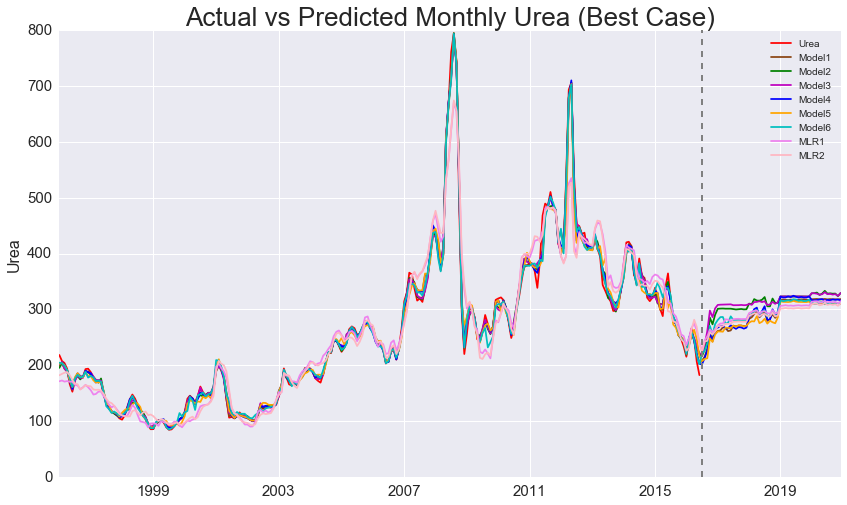

In [91]:
combined['Date'] = pd.to_datetime(combined['Date'])
date = combined['Date']
combined.index = combined['Date'].values
combined = combined.drop(['Date'],axis=1)
combined = combined.convert_objects(convert_numeric=True)
combined = combined.resample('MS',how='mean')
y1 = (combined['Urea'])
y2 = (combined['Model1'])
y3 = (combined['Model2'])
y4 = (combined['Model3'])
y5 = (combined['Model4'])
y6 = (combined['Model5'])
y7 = (combined['Model6'])
y8 = (combined['MLR1'])
y9 = (combined['MLR2'])
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
ax.plot(y1,'r')
ax.plot(y2,'saddlebrown')
ax.plot(y3,'g')
ax.plot(y4,'m')
ax.plot(y5,'b')
ax.plot(y6,'orange')
ax.plot(y7,'c')
ax.plot(y8,'violet')
ax.plot(y9,'lightpink')
plt.axvline(x='2016-07-01', ymin=0, linewidth=2, color='gray',linestyle = '--')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly Urea (Best Case)', size=(26))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea',size=(16))
plt.show()

## Worst Case MLR2
[Top](#table-of-contents)

In [92]:
#libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels import regression
import math
from matplotlib.ticker import MaxNLocator
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

In [93]:
data = pd.read_csv("C:/Users/msteinme/Documents/ureaUANjuneworst.csv")
df_96on = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN3','Urea']][0:1069]
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.tail(2)
#1/5/1996 - 6/24/2016

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN3,Urea
1067,2016-06-17,94.21,48.56,442.75,52.55,2.67,618651,1048312,169.92,185.0
1068,2016-06-24,95.45,48.31,389.00,52.90,2.69,618651,1048312,165.12,182.0


### MLR Models Worst MLR2
[Top](#table-of-contents)

In [94]:
# mlr1 top 3 of forward
featured_cols_top3 = ['Dollar','Urea_Inventory','UAN3']
X7 = df_96on[featured_cols_top3]
y7 = df_96on['Urea']
trainX7, testX7, trainY7, testY7 = train_test_split(X7,y7,test_size=0.3)
lm7 = LinearRegression()
lm7.fit(trainX7,trainY7)
zip(featured_cols_top3,lm7.coef_)

In [95]:
# mlr2 top 2 of forward
featured_cols_top2 = ['Dollar','UAN3']
X8 = df_96on[featured_cols_top2]
y8 = df_96on['Urea']
trainX8, testX8, trainY8, testY8 = train_test_split(X8,y8,test_size=0.3)
lm8 = LinearRegression()
lm8.fit(trainX8,trainY8)
zip(featured_cols_top2,lm8.coef_)

### RDF Models Worst MLR2
[Top](#table-of-contents)

In [96]:
#model 1
X1 = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN3']].values
y1 = df_96on['Urea'].values
X_train1, X_test1, y_train1, y_test1= train_test_split(X1,y1,test_size=0.3,random_state=1)
forest1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1.fit(X_train1, y_train1)
y_train_pred1= forest1.predict(X_train1)
y_test_pred1= forest1.predict(X_test1)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1, y_train_pred1),mean_squared_error(y_test1, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1, y_train_pred1),r2_score(y_test1,y_test_pred1)))
print(forest1.feature_importances_)

MSE train: 53.268, test: 387.722
R^2 train: 0.997, test: 0.979
[ 0.00907206  0.03879367  0.02508133  0.07380285  0.0139621   0.0085258
  0.00429402  0.82646817]


In [97]:
#model 2
X2 = df_96on[['Crude','My_Coal','UAN3']].values
y2 = df_96on['Urea'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3,random_state=1)
forest2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2.fit(X_train2, y_train2)
y_train_pred2 = forest2.predict(X_train2)
y_test_pred2 = forest2.predict(X_test2)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2, y_train_pred2),mean_squared_error(y_test2, y_test_pred2)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2, y_train_pred2),r2_score(y_test2,y_test_pred2)))
print(forest2.feature_importances_)

MSE train: 103.477, test: 445.086
R^2 train: 0.994, test: 0.976
[ 0.06286754  0.0904024   0.84673007]


In [98]:
#model 3
X3 = df_96on[['Crude','Corn','My_Coal','UAN3']].values
y3 = df_96on['Urea'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3,random_state=1)
forest3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3.fit(X_train3, y_train3)
y_train_pred3 = forest3.predict(X_train3)
y_test_pred3 = forest3.predict(X_test3)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3, y_train_pred3),mean_squared_error(y_test3, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3, y_train_pred3),r2_score(y_test3,y_test_pred3)))
print(forest3.feature_importances_)

MSE train: 90.616, test: 396.139
R^2 train: 0.995, test: 0.979
[ 0.05156886  0.03526253  0.0837051   0.82946351]


In [99]:
#model 4
X4 = df_96on[['Dollar','Urea_Inventory','UAN3']].values
y4 = df_96on['Urea'].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.3,random_state=1)
forest4 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4.fit(X_train4, y_train4)
y_train_pred4 = forest4.predict(X_train4)
y_test_pred4 = forest4.predict(X_test4)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4, y_train_pred4),mean_squared_error(y_test4, y_test_pred4)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4, y_train_pred4),r2_score(y_test4,y_test_pred4)))
print(forest4.feature_importances_)

MSE train: 117.377, test: 400.272
R^2 train: 0.994, test: 0.978
[ 0.03014151  0.02278788  0.94707061]


In [100]:
#model 5
X5 = df_96on[['Dollar','UAN3']].values
y5 = df_96on['Urea'].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.3,random_state=1)
forest5 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest5.fit(X_train5, y_train5)
y_train_pred5 = forest5.predict(X_train5)
y_test_pred5 = forest5.predict(X_test5)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train5, y_train_pred5),mean_squared_error(y_test5, y_test_pred5)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train5, y_train_pred5),r2_score(y_test5,y_test_pred5)))
print(forest5.feature_importances_)

MSE train: 290.521, test: 657.929
R^2 train: 0.984, test: 0.964
[ 0.04064276  0.95935724]


In [101]:
#model 6
X6 = df_96on[['Gas','Urea_Inventory','UAN3']].values
y6 = df_96on['Urea'].values
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6,y6,test_size=0.3,random_state=1)
forest6 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest6.fit(X_train6, y_train6)
y_train_pred6 = forest6.predict(X_train6)
y_test_pred6 = forest6.predict(X_test6)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train6, y_train_pred6),mean_squared_error(y_test6, y_test_pred6)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train6, y_train_pred6),r2_score(y_test6,y_test_pred6)))
print(forest6.feature_importances_)

MSE train: 102.539, test: 572.939
R^2 train: 0.994, test: 0.969
[ 0.02712477  0.02546695  0.94740828]


In [102]:
# comparing models that will be used
model1 = forest1.predict(X1)
model2 = forest2.predict(X2)
model3 = forest3.predict(X3)
model4 = forest4.predict(X4)
model5 = forest5.predict(X5)
model6 = forest6.predict(X6)
mlr1 = lm7.predict(X7)
mlr2 = lm8.predict(X8)
model1 = pd.DataFrame(model1)
model2 = pd.DataFrame(model2)
model3 = pd.DataFrame(model3)
model4 = pd.DataFrame(model4)
model5 = pd.DataFrame(model5)
model6 = pd.DataFrame(model6)
mlr1 = pd.DataFrame(mlr1)
mlr2 = pd.DataFrame(mlr2)
df_96on['MLR1'] = mlr1
df_96on['MLR2'] = mlr2
df_96on['Model1'] = model1
df_96on['Model2'] = model2
df_96on['Model3'] = model3
df_96on['Model4'] = model4
df_96on['Model5'] = model5
df_96on['Model6'] = model6
df_96on.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN3,Urea,MLR1,MLR2,Model1,Model2,Model3,Model4,Model5,Model6
0,1996-01-05,85.06,19.65,369.75,25.36,2.42,589899,1271053,114.00,220.0,170.227818,184.145479,210.809885,201.543412,200.956187,215.653333,216.727500,204.336112
1,1996-01-12,85.06,17.98,366.25,25.27,2.22,589899,1271053,114.96,220.0,171.369484,185.310499,210.269444,202.809095,206.686898,216.806667,217.769722,203.613303
2,1996-01-19,86.75,18.25,365.00,29.07,1.96,589899,1271053,114.96,218.0,169.393122,182.768256,199.081662,190.368655,199.099146,201.630509,201.001212,202.316136


### Predictions Part Worst MLR2
[Top](#table-of-contents)

In [103]:
#predictions section 7/1/2016 - 12/25/2020
newpred = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN3']][1069:1304]
newpred1 = data [['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN3']][1069:1304] #goes with model 1 and mlr1
newpred2 = data[['Crude','My_Coal','UAN3']][1069:1304] #goes with model 2
newpred3 = data[['Crude','Corn','My_Coal','UAN3']][1069:1304] #goes with model 3
newpred4 = data[['Dollar','Urea_Inventory','UAN3']][1069:1304] #goes with model 4
newpred5 = data[['Dollar','UAN3']][1069:1304]  #goes with model 5
newpred6 = data [['Gas','Urea_Inventory','UAN3']][1069:1304] #goes with model6
newpred7 = data[['Dollar','Urea_Inventory','UAN3']][1069:1304]#goes with mlr1
newpred8 = data[['Dollar','UAN3']][1069:1304]#goes with mlr2
newpred.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN3
1069,7/1/2016,95.65,49.65,360.00,58.15,2.98,659025,1186900,142.080000
1070,7/8/2016,96.30,46.12,355.00,59.25,2.79,659025,1186900,142.080000
1071,7/15/2016,98.65,45.51,376.97,52.74,2.50,659025,1186900,165.625135


In [104]:
newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN3'] #all variables used except urea
newpred['Date'] = pd.to_datetime(newpred['Date'])
print(newpred.dtypes)
newpred

Date              datetime64[ns]
Dollar                    object
Crude                     object
Corn                      object
My_Coal                   object
Gas                       object
Urea_Inventory            object
UAN_Inventory             object
UAN3                      object
dtype: object


,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN3
0,2016-07-01,95.65,49.65,360,58.15,2.98,659025,1186900,142.08
1,2016-07-08,96.3,46.12,355,59.25,2.79,659025,1186900,142.08
2,2016-07-15,98.65,45.51,376.97,52.74,2.5,659025,1186900,165.625
3,2016-07-22,96.01,46.24,345.11,52.65,2.31,659025,1186900,156.467
4,2016-07-29,97.95,46.63,355.82,52.85,2.67,659025,1186900,162.809
5,2016-08-05,99.41,43.36,370.12,51.94,2.38,635811,1250760,161.186
6,2016-08-12,96.62,41.82,362.94,52.59,2.47,635811,1250760,157.747
7,2016-08-19,98.64,40.33,362.27,52.81,2.31,635811,1250760,156.85
8,2016-08-26,98.32,46.34,362.38,52.68,2.69,635811,1250760,164.141
9,2016-09-02,98.1,46.91,380.22,51.93,2.6,462435,1258240,166.95


In [105]:
#model 1, 2, 3, 4, 5, 6 and mLR models
newpred_predicted1 = forest1.predict(newpred1)
df_new_pred1 = pd.DataFrame(newpred_predicted1)
newpred['Model1'] = df_new_pred1
newpred_predicted2 = forest2.predict(newpred2)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred['Model2'] = df_new_pred2
newpred_predicted3 = forest3.predict(newpred3)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Model3'] = df_new_pred3
newpred_predicted4 = forest4.predict(newpred4)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred['Model4'] = df_new_pred4
newpred_predicted5 = forest5.predict(newpred5)
df_new_pred5 = pd.DataFrame(newpred_predicted5)
newpred['Model5'] = df_new_pred5
newpred_predicted6 = forest6.predict(newpred6)
df_new_pred6 = pd.DataFrame(newpred_predicted6)
newpred['Model6'] = df_new_pred6
newpred_predicted7 = lm7.predict(newpred7)
df_new_pred7 = pd.DataFrame(newpred_predicted7)
newpred['MLR1'] = df_new_pred7
newpred_predicted8 = lm8.predict(newpred8)
df_new_pred8 = pd.DataFrame(newpred_predicted8)
newpred['MLR2'] = df_new_pred8
newpred.head(2)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN3,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
0,2016-07-01,95.65,49.65,360,58.15,2.98,659025,1186900,142.08,207.933634,208.063982,205.817444,190.622383,203.402456,159.826711,187.245791,202.291909
1,2016-07-08,96.3,46.12,355,59.25,2.79,659025,1186900,142.08,202.057150,208.816898,201.205937,190.809050,203.802456,161.510461,186.485652,201.314124


In [106]:
frames = [df_96on,newpred]
combined = pd.concat(frames)
combined.tail(2)

,Corn,Crude,Date,Dollar,Gas,MLR1,MLR2,Model1,Model2,Model3,Model4,Model5,Model6,My_Coal,UAN3,UAN_Inventory,Urea,Urea_Inventory
233,400.2,49.9,2020-12-18,99.25,2.92,231.947705,237.418933,219.358463,241.474142,241.922469,221.378217,248.664738,225.143324,50.91,175.488,1200000,NaN,500000
234,403,53.9,2020-12-25,95.6,2.99,239.269360,246.025209,223.351932,271.100613,285.315345,221.365949,234.251717,225.212351,51.3,178.055,1200000,NaN,500000


In [107]:
combined = combined[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN3','Urea','Model1','Model2','Model3','Model4','Model5','Model6','MLR1','MLR2']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN3','Urea','Model1','Model2','Model3','Model4','Model5','Model6','MLR1','MLR2']
combined

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN3,Urea,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
0,1996-01-05 00:00:00,85.06,19.65,369.75,25.36,2.42,589899,1271053,114,220,210.81,201.543,200.956,215.653,216.727,204.336,170.228,184.145
1,1996-01-12 00:00:00,85.06,17.98,366.25,25.27,2.22,589899,1271053,114.96,220,210.269,202.809,206.687,216.807,217.77,203.613,171.369,185.31
2,1996-01-19 00:00:00,86.75,18.25,365,29.07,1.96,589899,1271053,114.96,218,199.082,190.369,199.099,201.631,201.001,202.316,169.393,182.768
3,1996-01-26 00:00:00,87.64,17.36,360.25,29.2,1.95,589899,1271053,115.6,215,185.243,186.974,197.682,171.812,175.734,189.616,169.113,182.206
4,1996-02-02 00:00:00,87.01,17.38,370.5,32.11,2.08,609091,1360395,117.2,205,202.597,201.046,203.79,202.311,201.793,203.763,170.645,185.096
5,1996-02-09 00:00:00,86.87,17.38,367.25,28.67,2.24,609091,1360395,117.2,205,204.167,205.7,206.397,202.945,202.597,204.438,170.809,185.306
6,1996-02-16 00:00:00,85.91,18.4,382.75,28.17,2.17,609091,1360395,117.2,210,204.341,205.202,203.6,204.075,202.926,203.543,171.931,186.75
7,1996-02-23 00:00:00,85.43,18.45,383.5,28.83,2.26,609091,1360395,117.2,210,206.967,204.322,204.837,209.76,208.973,205.128,172.493,187.472
8,1996-03-01 00:00:00,86.49,18.62,386.75,27.86,2.06,681818,1523421,117.2,210,200.614,202.155,200.845,202.35,201.391,203.223,167.054,185.878
9,1996-03-08 00:00:00,86.81,18.87,388.5,26.51,2.05,681818,1523421,117.2,205,200.135,193.063,193.002,203.857,202.597,203.223,166.679,185.396


In [108]:
combined.to_csv("C:/Users/msteinme/Documents/Ureajuneworstresults3.csv")

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


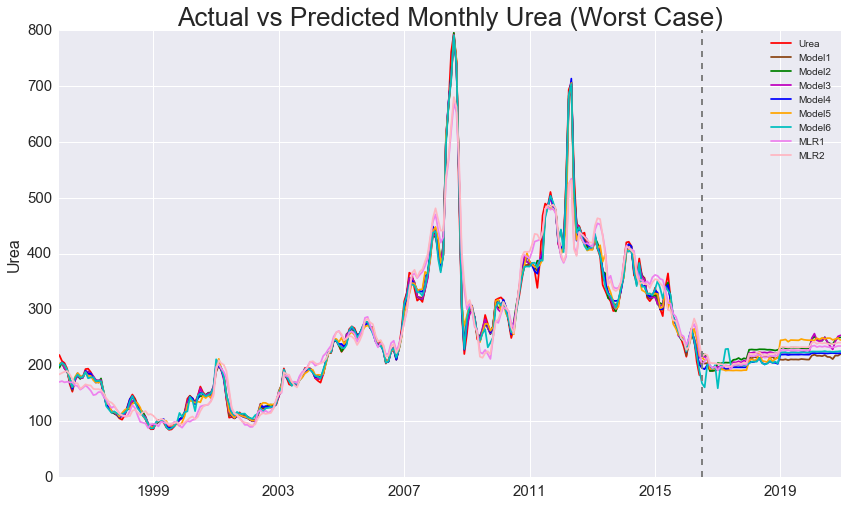

In [109]:
combined['Date'] = pd.to_datetime(combined['Date'])
date = combined['Date']
combined.index = combined['Date'].values
combined = combined.drop(['Date'],axis=1)
combined = combined.convert_objects(convert_numeric=True)
combined = combined.resample('MS',how='mean')
y1 = (combined['Urea'])
y2 = (combined['Model1'])
y3 = (combined['Model2'])
y4 = (combined['Model3'])
y5 = (combined['Model4'])
y6 = (combined['Model5'])
y7 = (combined['Model6'])
y8 = (combined['MLR1'])
y9 = (combined['MLR2'])
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
ax.plot(y1,'r')
ax.plot(y2,'saddlebrown')
ax.plot(y3,'g')
ax.plot(y4,'m')
ax.plot(y5,'b')
ax.plot(y6,'orange')
ax.plot(y7,'c')
ax.plot(y8,'violet')
ax.plot(y9,'lightpink')
plt.axvline(x='2016-07-01', ymin=0, linewidth=2, color='gray',linestyle = '--')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly Urea (Worst Case)', size=(26))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea',size=(16))
plt.show()